In [1]:
## Cell required to run other cells in the file
## Preferably run under py3k env
%pylab inline
import pandas as pd
import h5py
import xarray as xr
import glob, re, os
import scipy
import pickle
import sz
from IPython.core.debugger import Tracer

# Adjust screen output (inline) dpi, default in web is as low as 80
mpl.rc("savefig", dpi=400)
plt.rcParams['image.cmap'] = 'jet' # Set default colormap to jet
plt.rcParams.update({'font.size': 15}) # Set default fontsize to 20 to accomodate figsize=(11,*)

# import traceback
# import warnings
# import sys
# # warnings.filterwarnings('error')

# def warn_with_traceback(message, category, filename, lineno, file=None, line=None):
#     traceback.print_stack()
#     log = file if hasattr(file,'write') else sys.stderr
#     log.write(warnings.formatwarning(message, category, filename, lineno, line))
## uncomment the following line to have detailed warning info
# warnings.showwarning = warn_with_traceback

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'Bitstream Vera Sans','sans-serif':['Helvetica']})

### Load the created data
# rawvar = pd.read_hdf('pythondata/hiwcdata.h5',key='rawvar')
# rawvards = xr.open_dataset('pythondata/rawvards.h5')
# rawpsd = pd.read_hdf('pythondata/hiwcdata.h5',key='rawpsd')
bin_div = pd.read_hdf('pythondata/hiwcdata.h5',key='bin_div').as_matrix().ravel()
bin_mid = (bin_div[:-1]+bin_div[1:])/2.
bin_diff = np.diff(bin_div)

# # file not yet opened
# with open('pythondata/mmd.p', 'rb') as f:
#     # file opened
#     MMD = pickle.load(f)
#     # file opened
# # file closed

# with open('pythondata/fitted.p', 'rb') as f:
#     # file opened
#     FITS = pickle.load(f)
#     # file opened
# # file closed

numofflts = 23
rootpath = '/data/mcfarq/a/szhu28/research/HIWC/data/fulldataDarwin'

# ## Creating iwc
# iwc = rawvar['XKBZR5s']
# temp = rawvar['air_temperature']
# ## Creating NML
# targetarr = []
# for x in FITS:
#     ## None means less than 10 valid bins are present,
#     ## 'Error' means the fitting fails for the PSD
#     if (x is None) or (x == 'Error'):
#         targetarr.append([np.nan]*3)
#     else:
#         targetarr.append(x.x)
# #         print('Warning! Not aligned!')
# #         print(x)
# NML = np.array(targetarr)

# ## Create dataset dataf combining rawvar and nml, which is still same len as rawvar
# temp = rawvar['air_temperature']
# nml = np.empty((len(iwc),3))+np.nan
# nml[rawpsd['indpsdbackward'],:] = NML
# n0 = nml[:,0]
# mu = nml[:,1]
# ld = nml[:,2]
# mmd = np.empty((len(iwc),))+np.nan
# mmd[rawpsd['indpsdbackward']] = MMD
# indpsdforward = rawvar['indpsdforward']

# dataf = rawvar
# dataf['temp'] = temp
# dataf['indpsdforward'] = indpsdforward
# dataf['n0'] = n0
# dataf['mu'] = mu
# dataf['ld'] = ld
# dataf['mmd'] = mmd
# dataf['iwc'] = iwc

# ### add the psd characteristics to rawvards as well
# rawvards['mmd']=xr.DataArray(mmd,coords={'time':rawvards.time})
# rawvards['n0']=xr.DataArray(n0,coords={'time':rawvards.time})
# rawvards['mu']=xr.DataArray(mu,coords={'time':rawvards.time})
# rawvards['ld']=xr.DataArray(ld,coords={'time':rawvards.time})

# def loadRastaflt(szi):
#     datapath='/data/mcfarq/a/szhu28/research/HIWC/data/fulldataDarwin/RASTA/data/'
#     rastafn=glob.glob(datapath+'*_F'+str(szi)+'_*.nc')
#     if len(rastafn) ==0:
#         return None
#     ds = xr.open_dataset(rastafn[0])
#     tmp = (ds.time.values*3600).astype('timedelta64[s]')
#     midnight = np.datetime64(rawvar.index[rawvar['flightnum']==szi][0].date())
#     ds['timeSec'] = ds.time
#     ds['time'] = xr.DataArray(tmp+midnight,coords={'time':ds.time})
#     tmp = ds.time
#     if tmp.shape == np.unique(tmp).shape:
#         print('flight '+str(szi)+' good')
#     else:
#         print(str(tmp.shape - np.unique(tmp).shape)+' data duplicate disregarded in the future')
#     return ds

# ##future indexing method: ds.sel(time=datetimearray)

# ## Easy function to sub-setting data based on iwc, temperature, mmd based on dataf
# def subsetdata(tempr=[-inf,inf], iwcr=[-inf,inf], mmdr=[-inf,inf],msd=False):

#     tmpind = (dataf['temp']>tempr[0]) & (dataf['temp']<tempr[1])
#     tmpind = tmpind & (dataf['iwc']>iwcr[0]) & (dataf['iwc']<iwcr[1])
#     # tmpind = (dataf['temp']>-37.5) & (dataf['temp']<-32.5)
#     # tmpind = tmpind & (dataf['iwc']<5) & (dataf['iwc']>2.5)
#     tmpind = tmpind & (dataf['mmd']>mmdr[0]) & (dataf['mmd']<mmdr[1])
#     tmpdataf = dataf[tmpind]
    
#     tmpindrawvar = tmpdataf['indpsdforward']
#     tmpindrawvar = tmpindrawvar[~isnan(tmpindrawvar)].astype(int)
    
#     tmpindrawvar = rawpsd['indpsdbackward'][tmpindrawvar]

#     indlvl1 = ~isnan(tmpdataf['indpsdforward'])
#     a = tmpdataf['indpsdforward'][indlvl1]
#     nonpsd = tmpdataf[indlvl1]
#     if msd==False:
#         psd = rawpsd['psddmax'].iloc[ a.astype(int),: ]
#     else:
#         psd = rawpsd['msddmax'].iloc[ a.astype(int),: ]
#     ## Use rawvar.iloc[tmpindrawvar] for data access
#     return nonpsd,psd, tmpindrawvar

# ## Merge the rasta dataset with the rawvar dataset
# rawvar.index.rename('time',inplace=True)
'''
rastads = xr.open_dataset('rastacombine.h5')
rawds = rawvar.to_xarray()
## Find duplicate conflict variables and rename the rasta ones
rawkeys = set(rawds.data_vars.keys())
rastakeys = set(rastads.data_vars.keys())
dup = rawkeys.intersection(rastakeys)
renamedict = { dupstr:dupstr+'_rasta' for dupstr in dup}
rastads.rename(renamedict,inplace=True)
rastaraw = xr.merge([rawds,rastads])

# rastaraw.to_netcdf('rasta_raw_cmb.h5',format='NETCDF4',mode='w')
'''
## Read rasta rawvar combined xarray dataset
cmbds = xr.open_dataset('pythondata/rasta_raw_cmb.h5',engine='netcdf4')
rastads = xr.open_dataset('pythondata/rastacombine.h5')
rawpsd = xr.open_dataset('pythondata/psdds.h5')

Populating the interactive namespace from numpy and matplotlib


/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWar

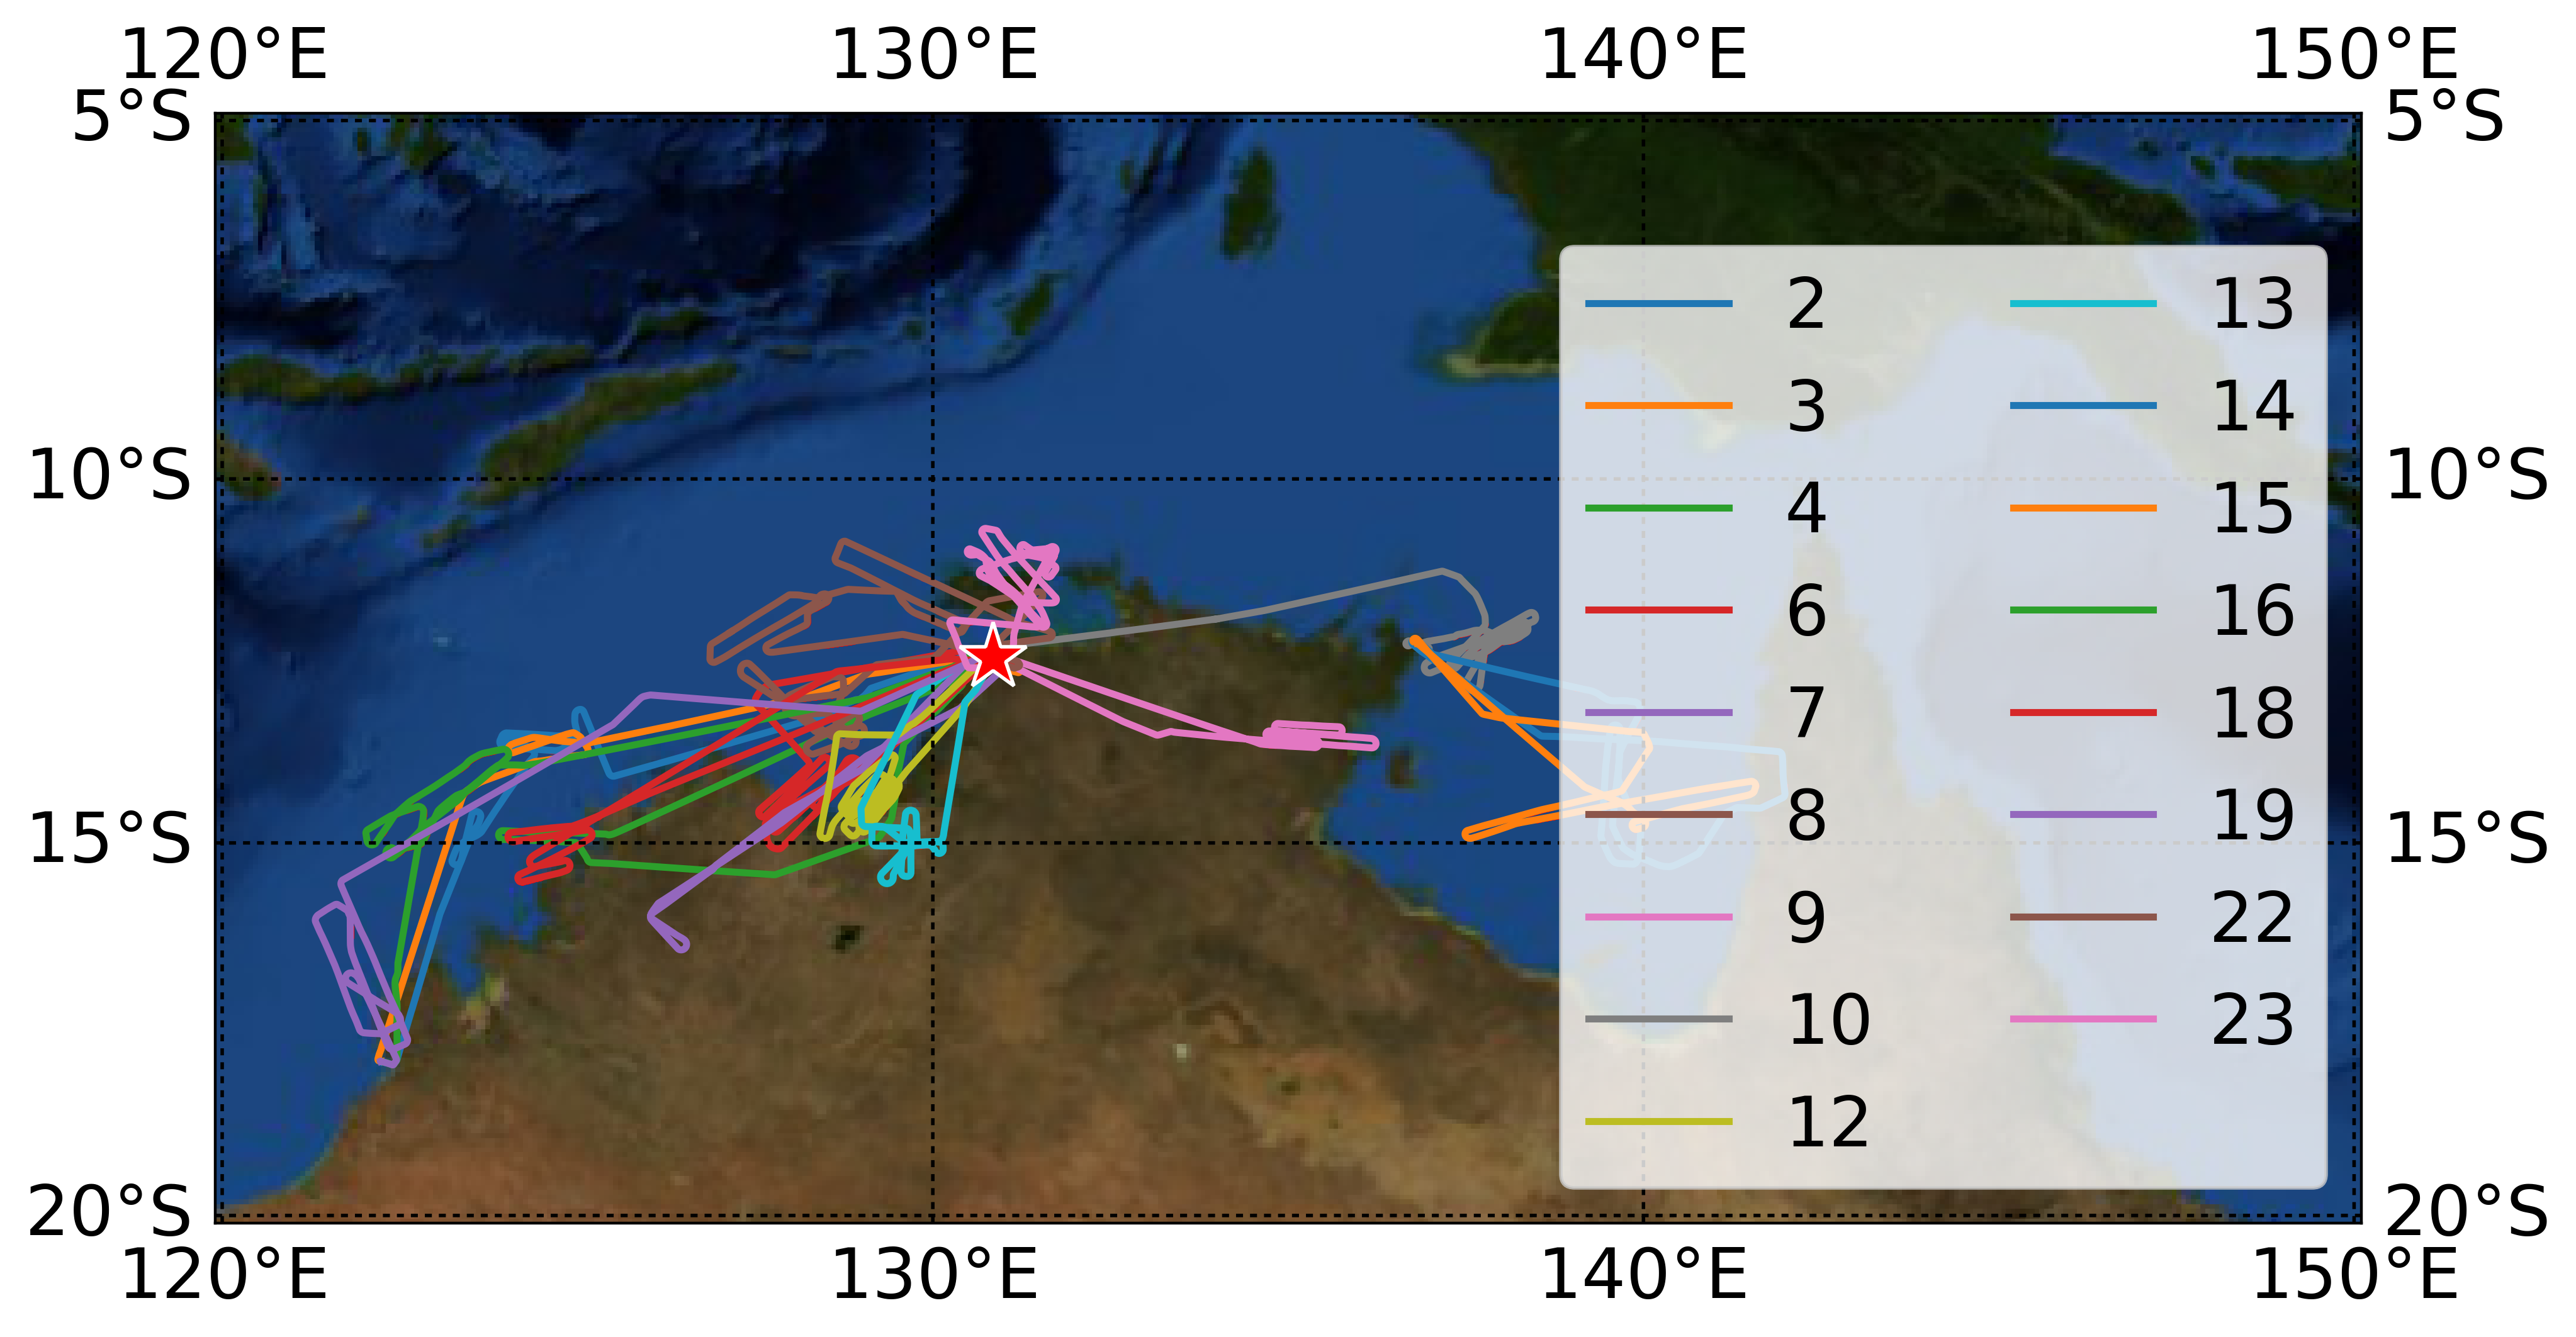

In [2]:

## Flight tracks
from mpl_toolkits.basemap import Basemap

loopthru=np.arange(1,24)
loopthru=np.delete(loopthru,np.array([1,5,21,11,17,20])-1)
m = Basemap(projection='merc',resolution='f',llcrnrlon=119.9,llcrnrlat=-20.1,fix_aspect=True,
            urcrnrlon=150.1,urcrnrlat=-4.9)
# m.aspect=1.
rawvards = cmbds
mlon,mlat = m(rawvards.longitude.values, rawvards.latitude.values)

plt.figure(figsize=(11,11))
for szi in loopthru:
    # haha=mpl.cm.ScalarMappable(cmap='Set1')
    # _=haha.to_rgba(loopthru)

    # ax=list()
    ## Use xr(boolean).values, otherwise index by int rather than bool and will throw out a warning
    tmpind=(rawvards.flightnum==szi).values
#     plt.plot( mlon[tmpind],mlat[tmpind] )
    plt.plot( mlon[tmpind],mlat[tmpind], label=szi.astype(str),lw=2)
    tmpindhiwc = (tmpind & (rawvards.XKBZR5s>1.5)).values
    plt.scatter(mlon[tmpindhiwc],mlat[tmpindhiwc],c='r',s=3,linewidths=0)
    
m.bluemarble()
m.drawmeridians(np.arange(110,150.1,10),labels=[1,1,1,1],fontsize=20)
m.drawparallels(np.arange(-30,5.1,5),labels=[1,1,1,1],fontsize=20)
plt.legend(fontsize=20,ncol=2)
darwincoord=m(130.8456,-12.4634)
plt.plot(darwincoord[0],darwincoord[1],'r*',ms=20,markeredgecolor='w')
    # m.shadedrelief()
#     plt.show()
plt.savefig('tmpfig/flighttracks.png', format='png',bbox_inches='tight', dpi=400)

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive


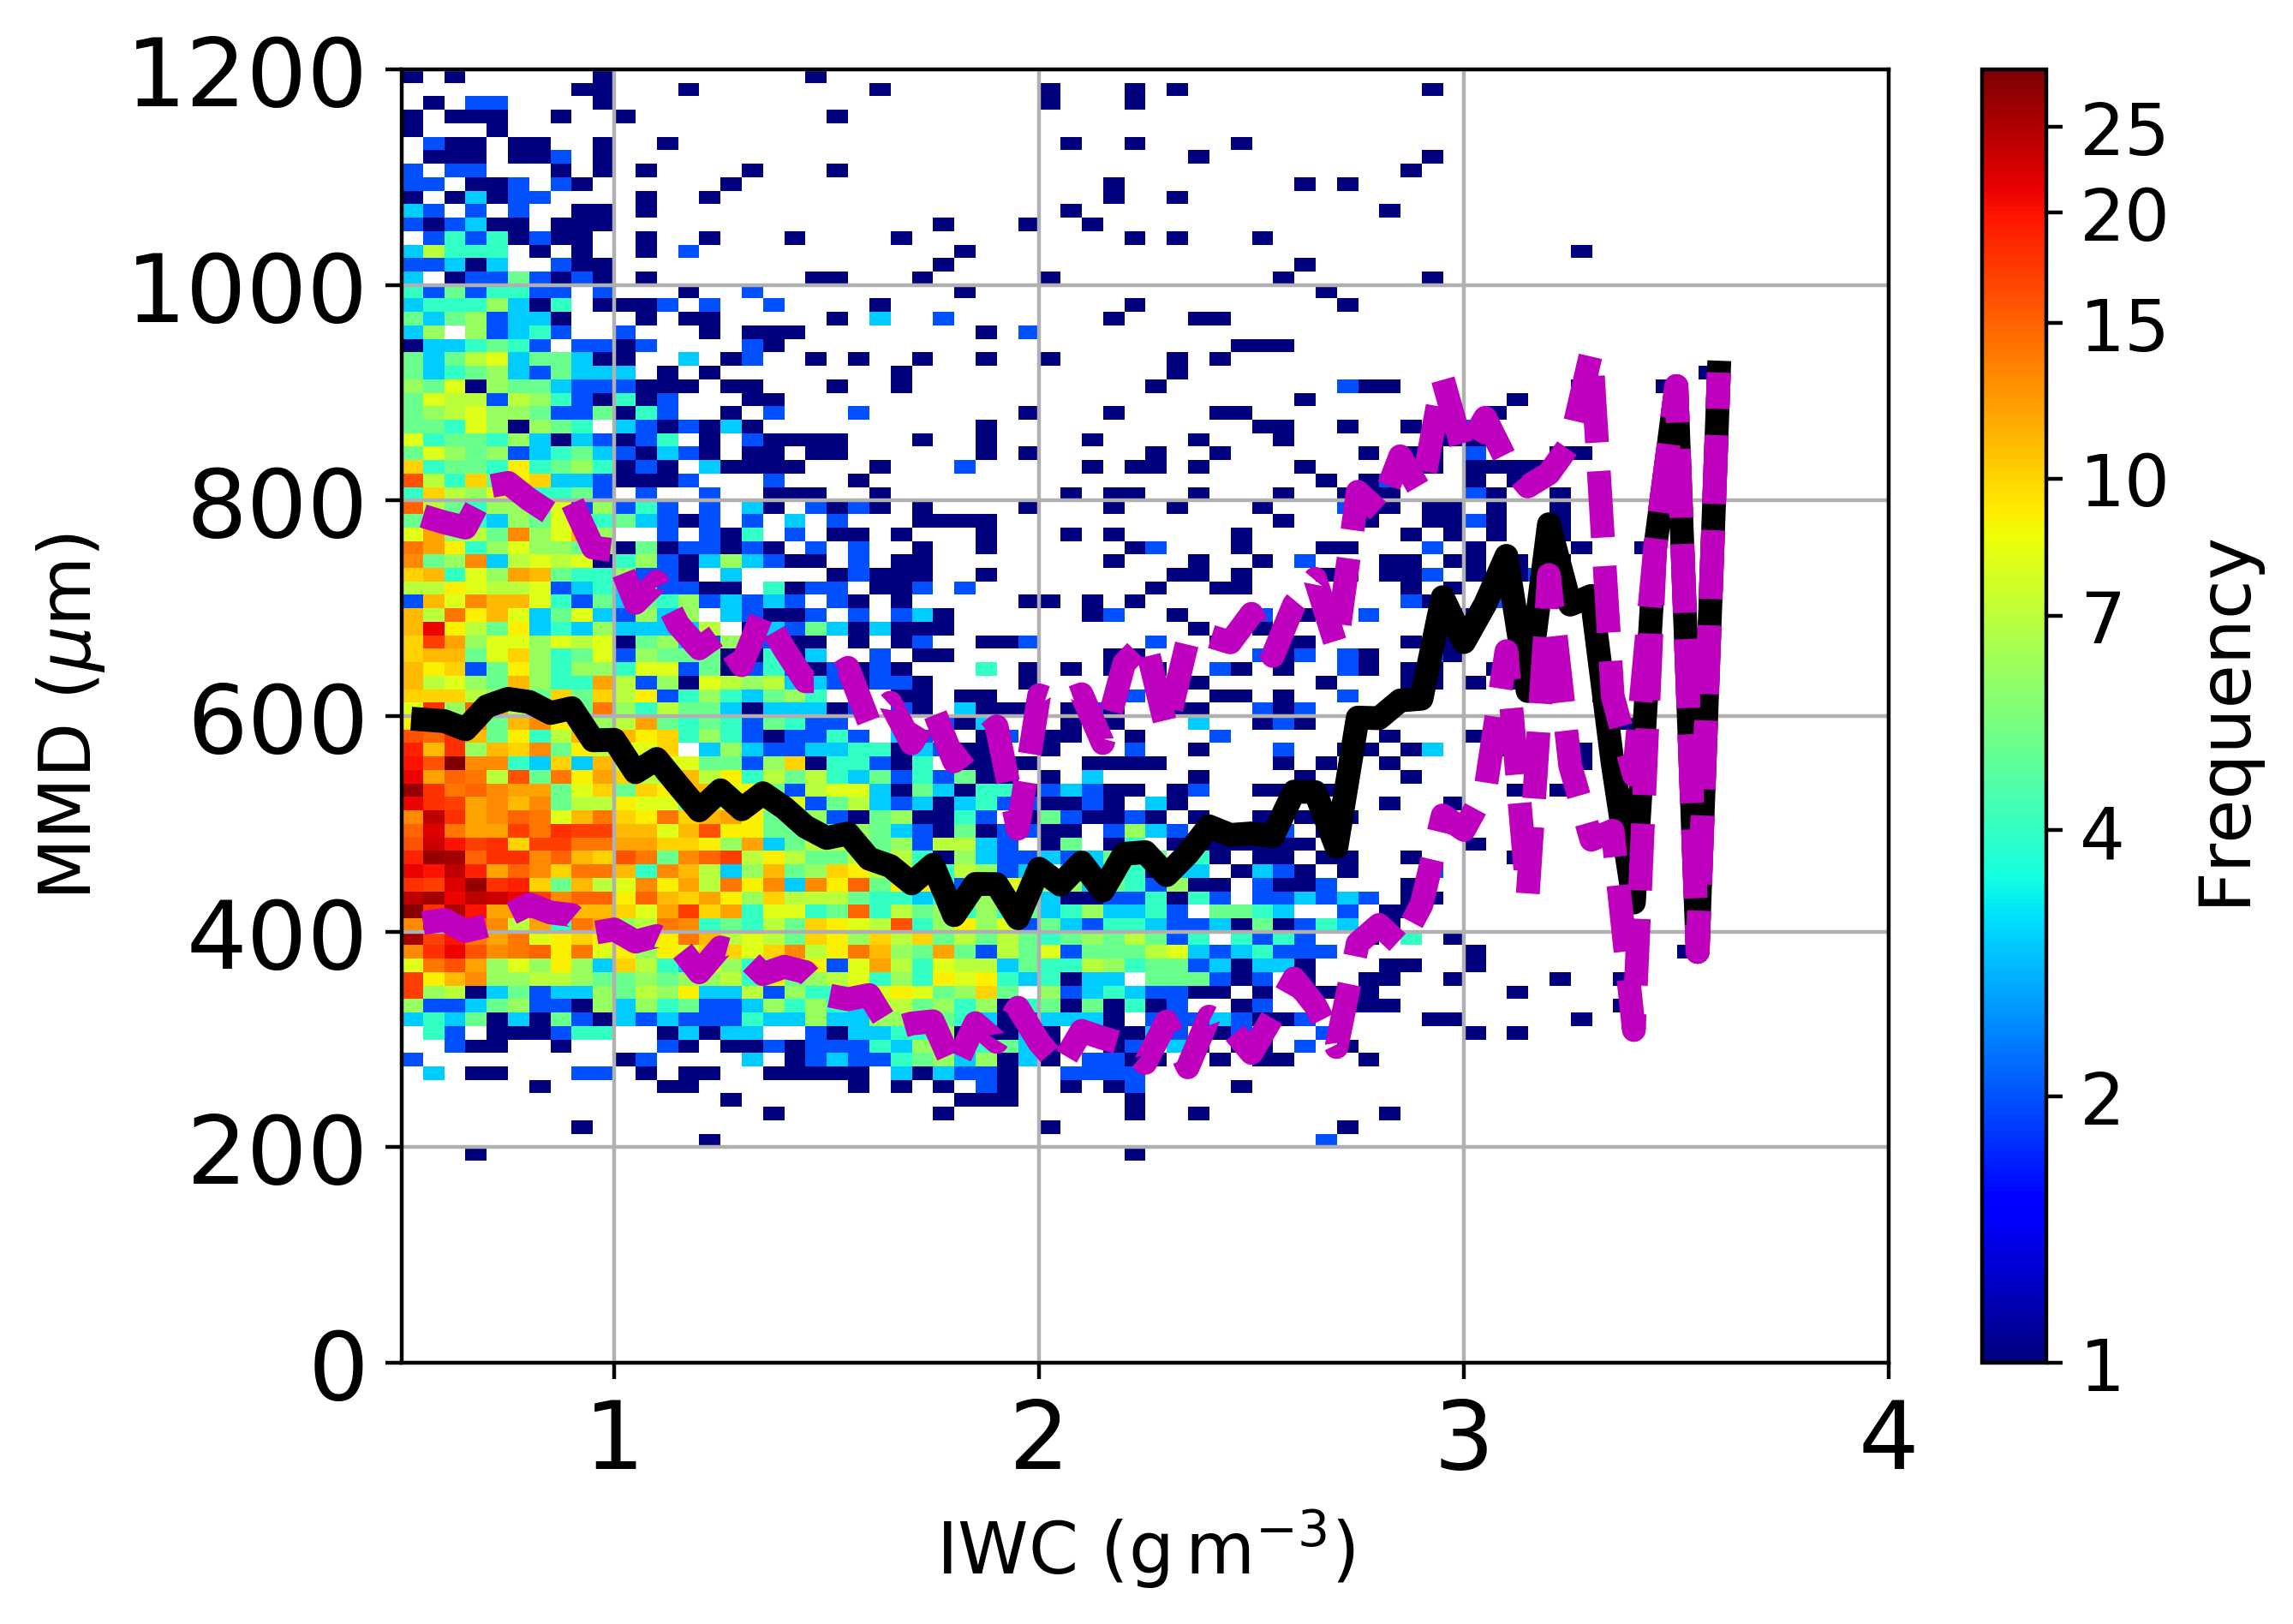

In [13]:
iwc = cmbds.XKBZR5s
rawvar = cmbds
ind = (iwc>0.5) & (~isnan(rawvar['mmd']))
tmpiwc = iwc[np.array(ind)]
mmd = cmbds.mmd[ind]
# any(isnan(mmd))

plt.figure(figsize=(7,5))
from matplotlib.colors import LogNorm
reso = 8
# output = plt.hist2d(tmpiwc,mmd,range=[[0.5,4.5],[0,1200]],bins=np.array([10,12])*5,norm=LogNorm(),cmin=3)
output = plt.hist2d(tmpiwc,mmd,range=[[0.5,4.5],[0,1200]],bins=np.array([10,12])*reso,norm=LogNorm())
# counts,ybins,xbins,image = plt.hist2d(tmpiwc,mmd,range=[[0.5,4.5],[0,1200]],bins=np.array([10,12])*5,norm=LogNorm(),cmin=3)
# plt.clf()
# plt.contourf(counts.transpose(),extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()])
cb = plt.colorbar()
cb.set_label('Frequency')
clabellist = [1,2,4,7,10,15,20,25]
cb.set_ticks(clabellist, update_ticks=True)
cb.set_ticklabels(clabellist)
plt.grid(b=True)
plt.xlabel('IWC (g$\,\mathrm{m}^{-3}$)')
plt.ylabel('MMD ($\mu$m)')

import numpy.ma as ma
iwcmmdct = output[0].transpose()
f = output[2]
f = (f[:-1]+f[1:])/2.
x = output[1][1:]
marray = ma.masked_array(iwcmmdct,isnan(iwcmmdct))
meanval = ma.average(tile(f,[10*reso,1]).transpose(),axis=0,weights=marray)
meanstd = ma.sqrt(ma.average((tile(f,[10*reso,1]).transpose()-meanval)**2,axis=0,weights=marray))
gca().tick_params(labelsize=20)
plt.plot(x,meanval,'k-',lw=5)
plt.plot(x,meanval+meanstd,'m--',lw=5)
plt.plot(x,meanval-meanstd,'m--',lw=5)
plt.xlim(.5,4.0)
meanval[2],meanstd[2]
plt.savefig('tmpfig/freqiwcmmd.jpg', format='jpg',bbox_inches='tight', dpi=400)

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in less
  if not reflexive


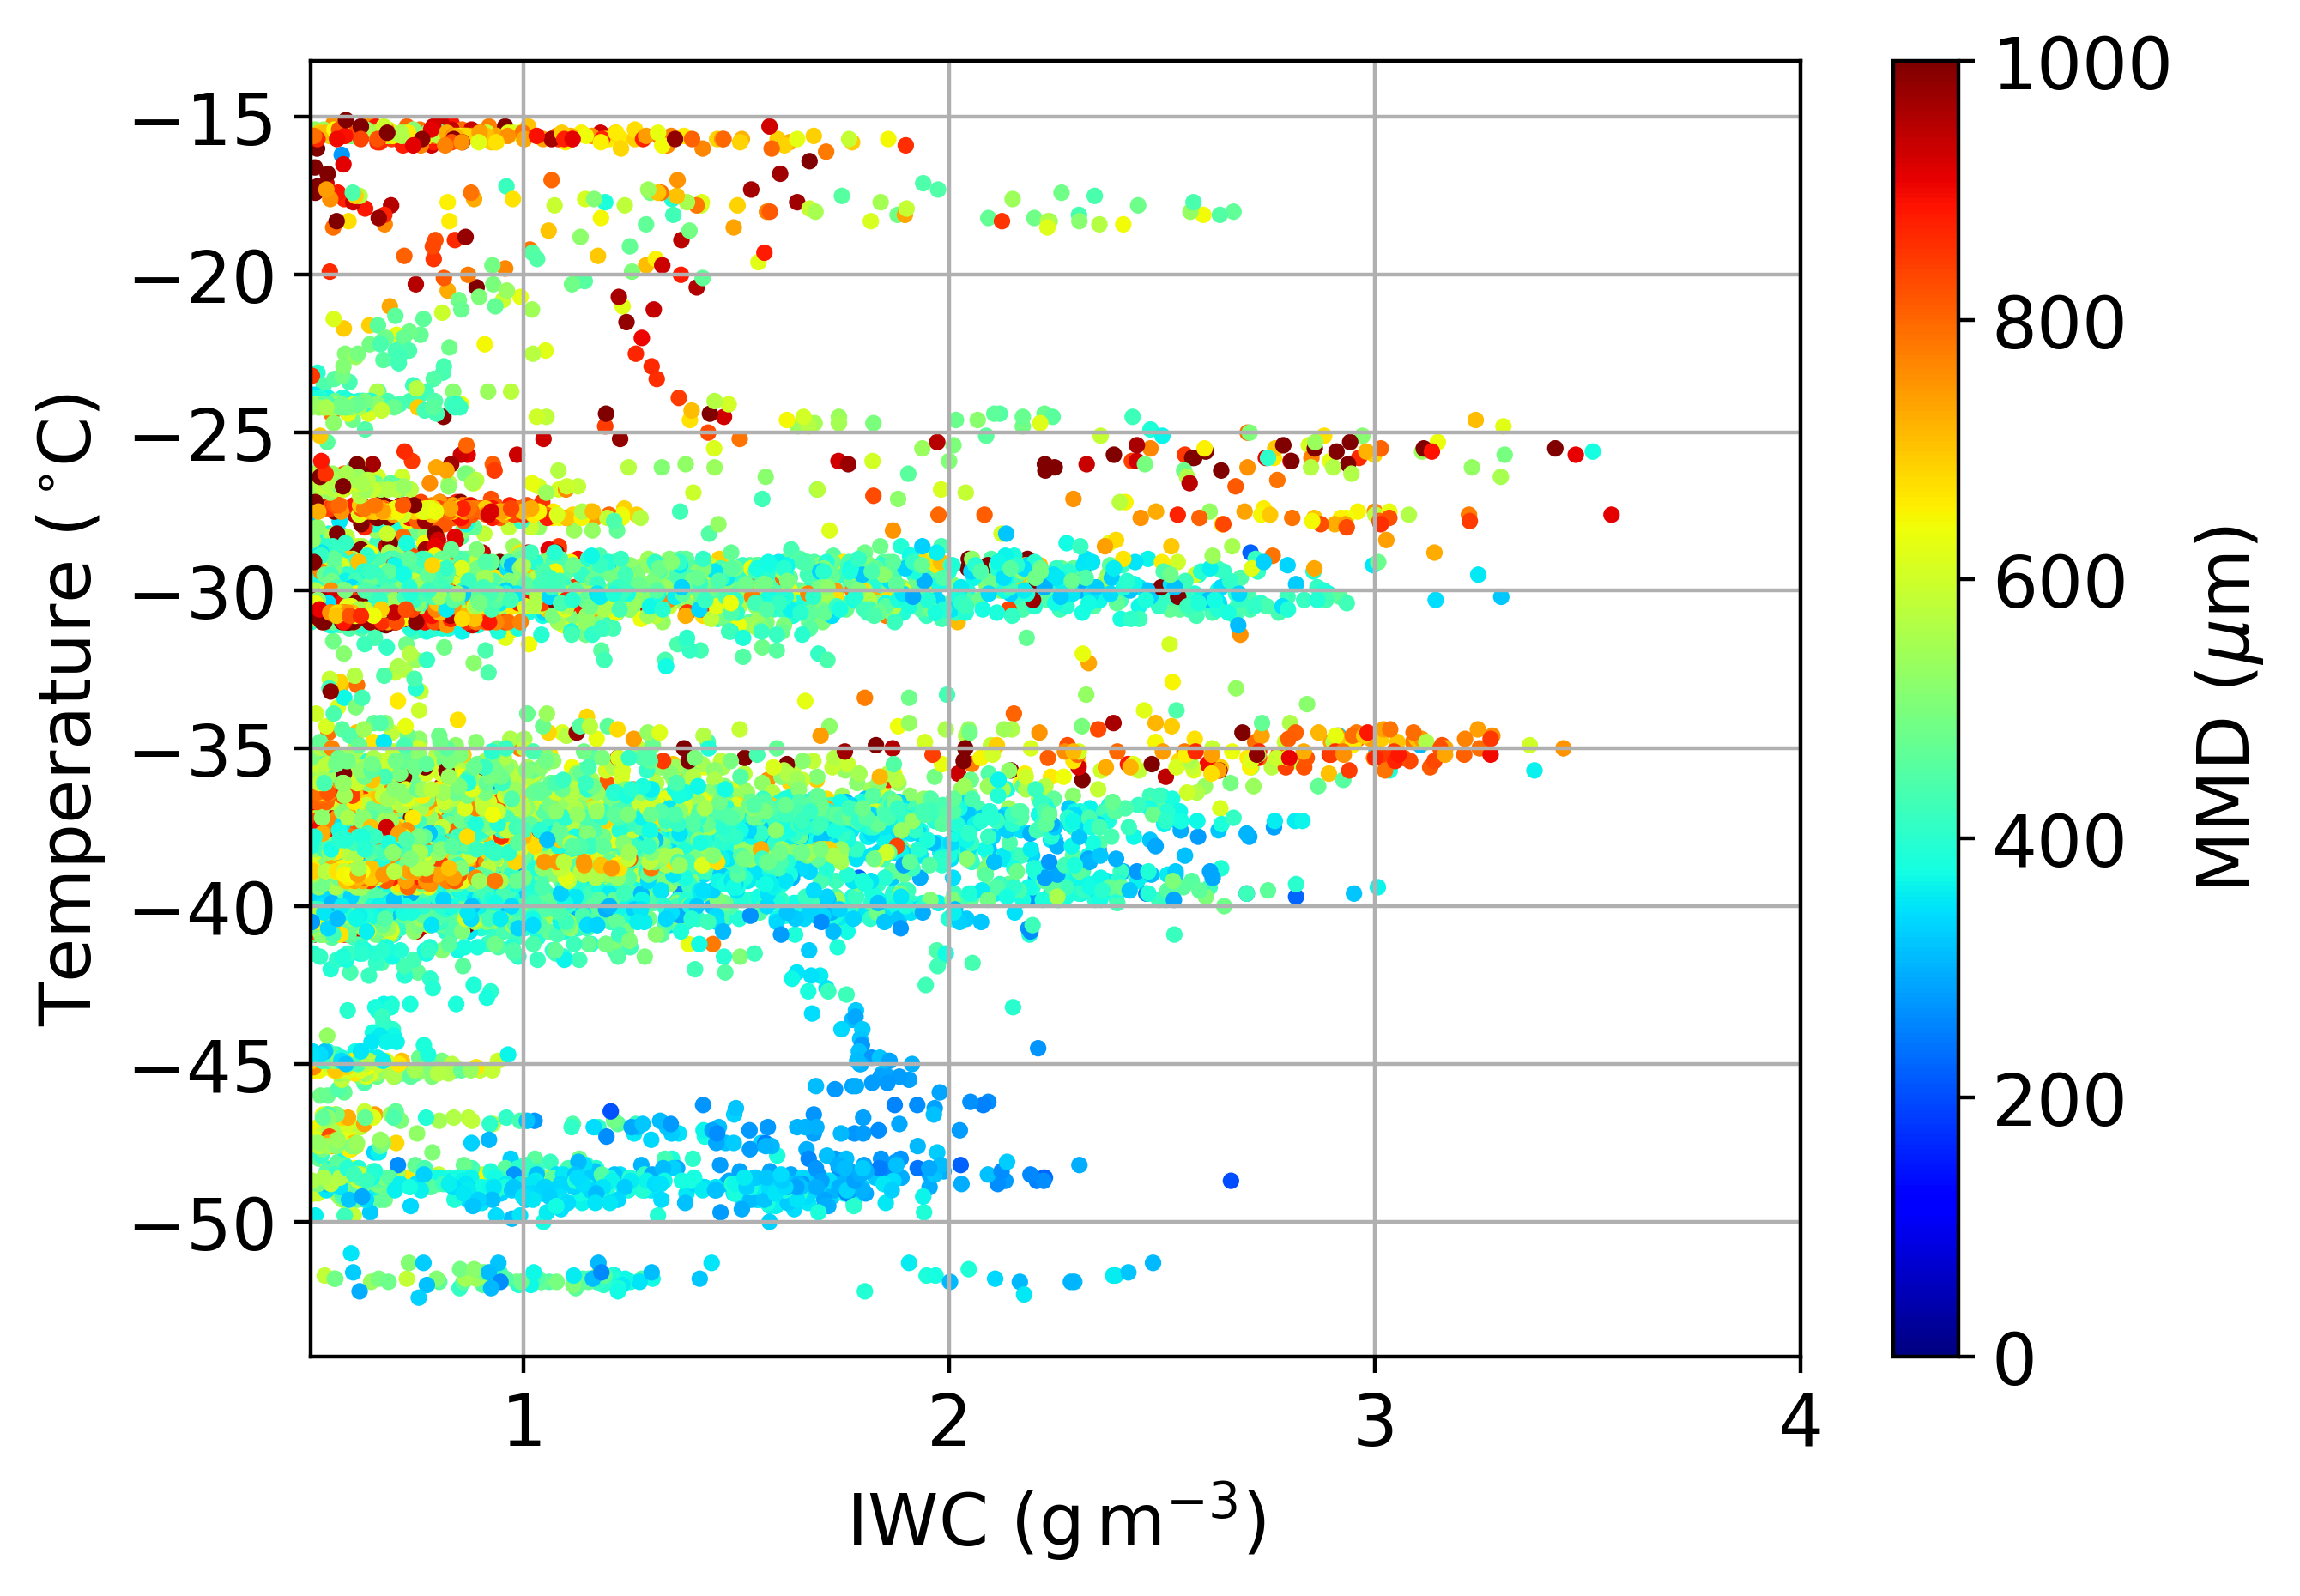

In [12]:
iwc = cmbds.XKBZR5s
rawvar = cmbds
ind = (iwc>0.5) & (~isnan(rawvar['mmd'])) & (rawvar['air_temperature']<-15)
tmpiwc = iwc[np.array(ind)]
mmd = cmbds.mmd[ind]
temp = cmbds.air_temperature[ind]

plt.figure(figsize=(7,5))
collection = {'linewidths':0,'antialiaseds':True}
## All PSD's
scatter(tmpiwc, temp, c=mmd, s=12, **collection)
cb = plt.colorbar()
cb.set_label('MMD ($\mu$m)')
plt.xlabel('IWC (g$\,\mathrm{m}^{-3}$)')
plt.ylabel(r'Temperature ($^\circ\!$C)')
plt.xlim(.5,4.0)
# plt.ylim(0,.015)
plt.clim(0,1000)
plt.grid(b=True)
plt.savefig('tmpfig/mmdscatter.jpg', format='jpg',bbox_inches='tight', dpi=400)
plt.show()

# iwc = cmbds.XKBZR5s
# rawvar = cmbds
# ind = (iwc>0.5) & (~isnan(rawvar['mmd'])) & (dataf['air_temperature']<-15)
# tmpiwc = iwc[np.array(ind)]
# mmd = cmbds.mmd[ind]
# temp = cmbds.air_temperature[ind]

# plt.figure(figsize=(11,8))
# collection = {'linewidths':0,'antialiaseds':True}
# ## All PSD's
# scatter(tmpiwc, temp, c=mmd, s=3, **collection)
# cb = plt.colorbar()
# cb.set_label('MMD (um)')
# plt.xlabel('IWC')
# plt.ylabel(r'Temperature')
# plt.xlim(.5,4.0)
# # plt.ylim(0,.015)
# plt.clim(0,1000)
# plt.grid(b=True)
# plt.show()

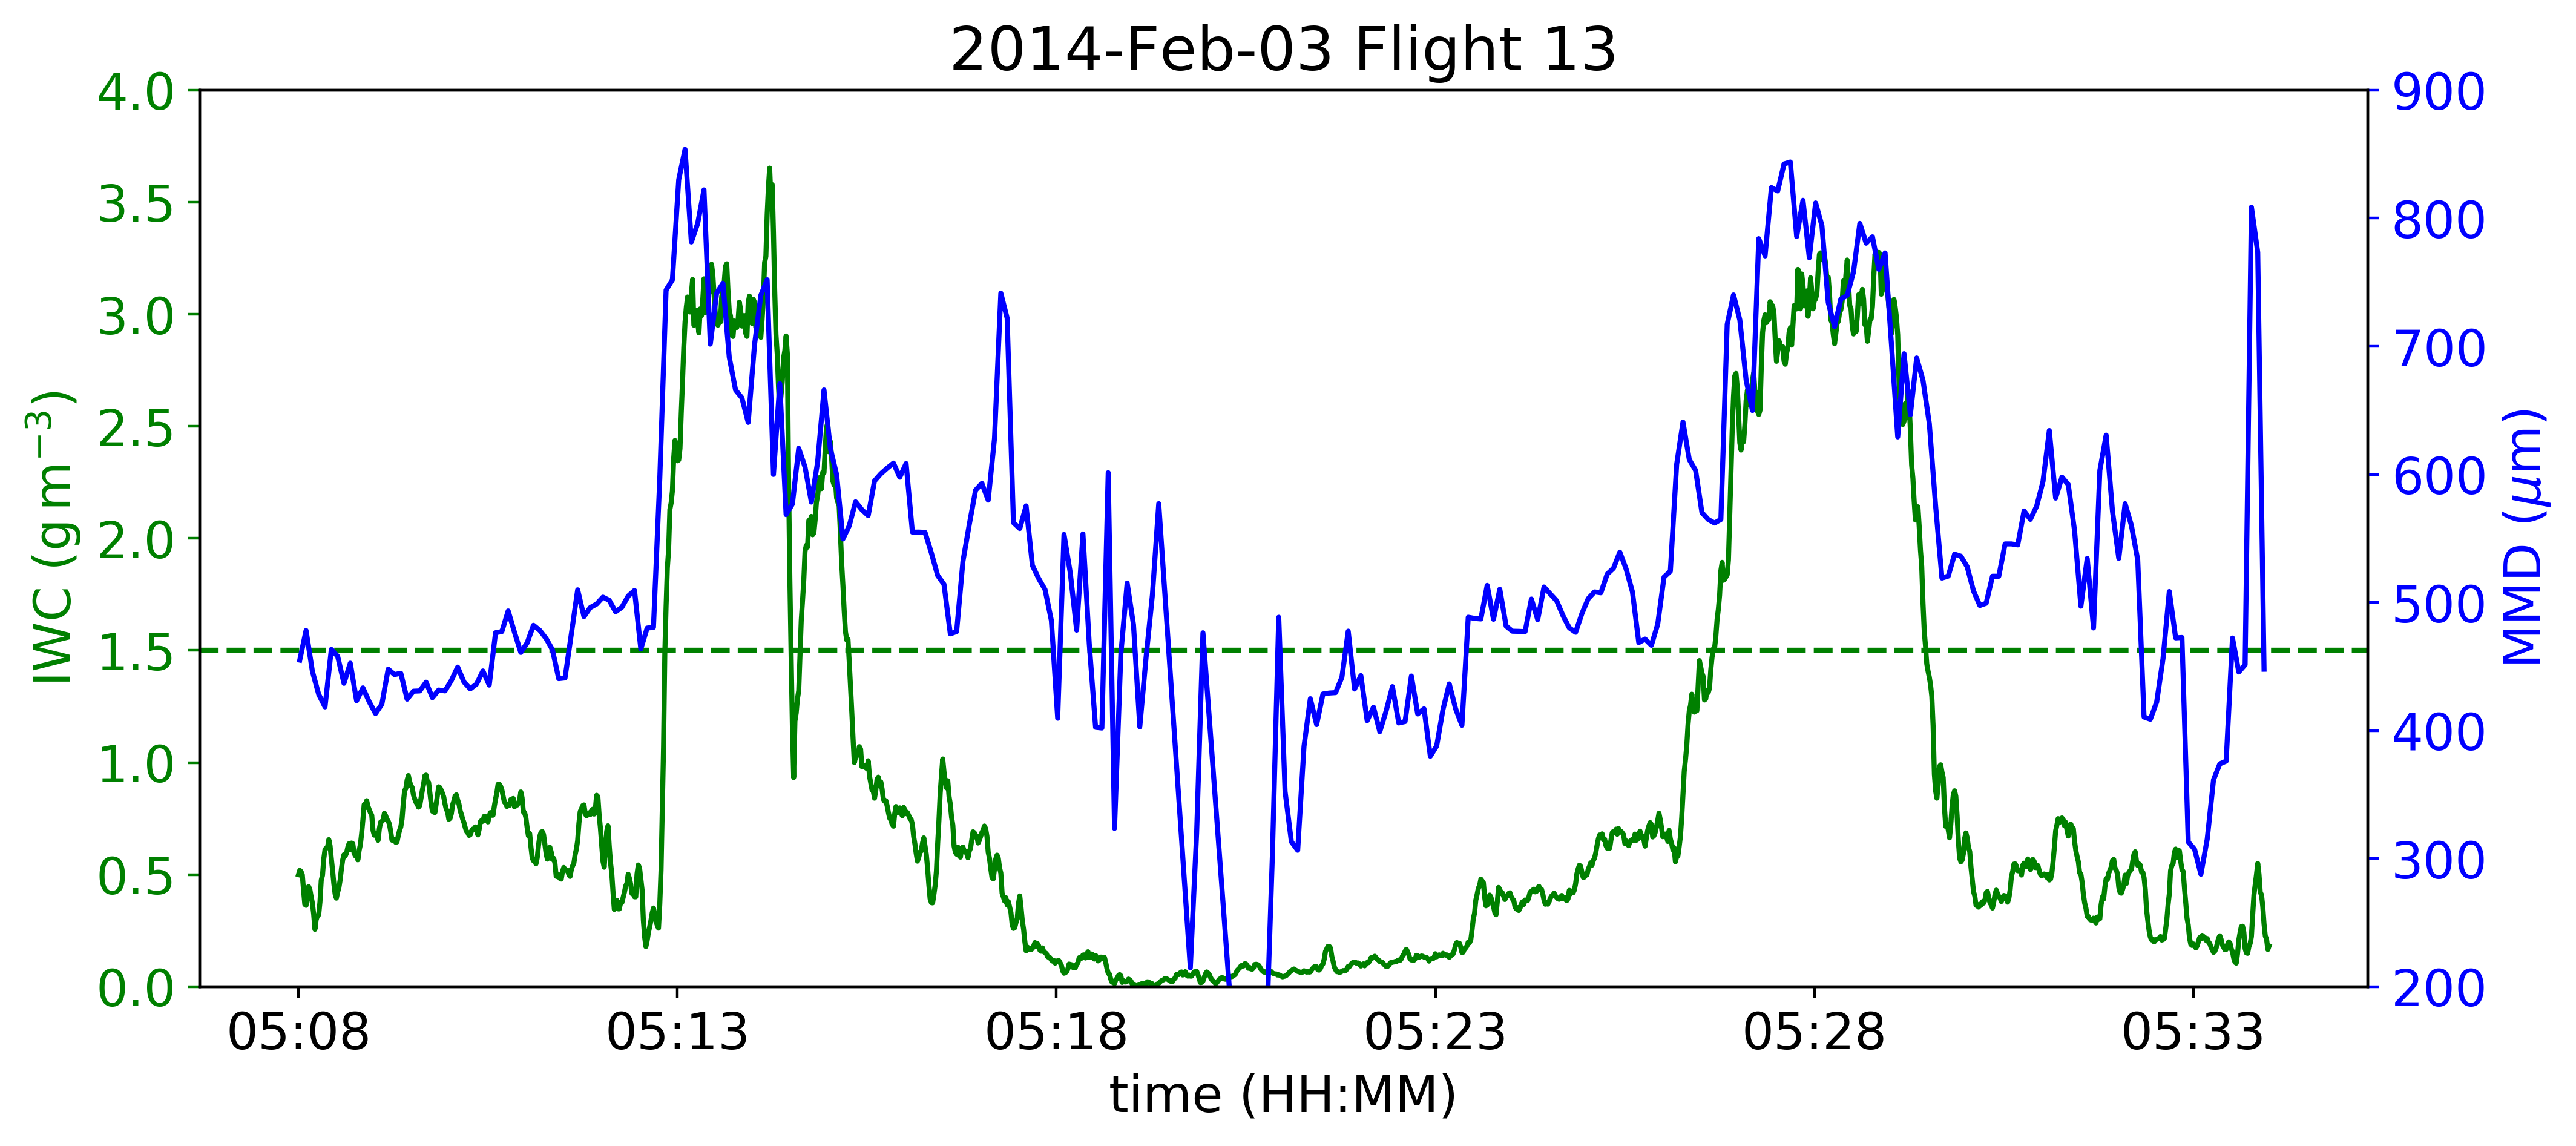

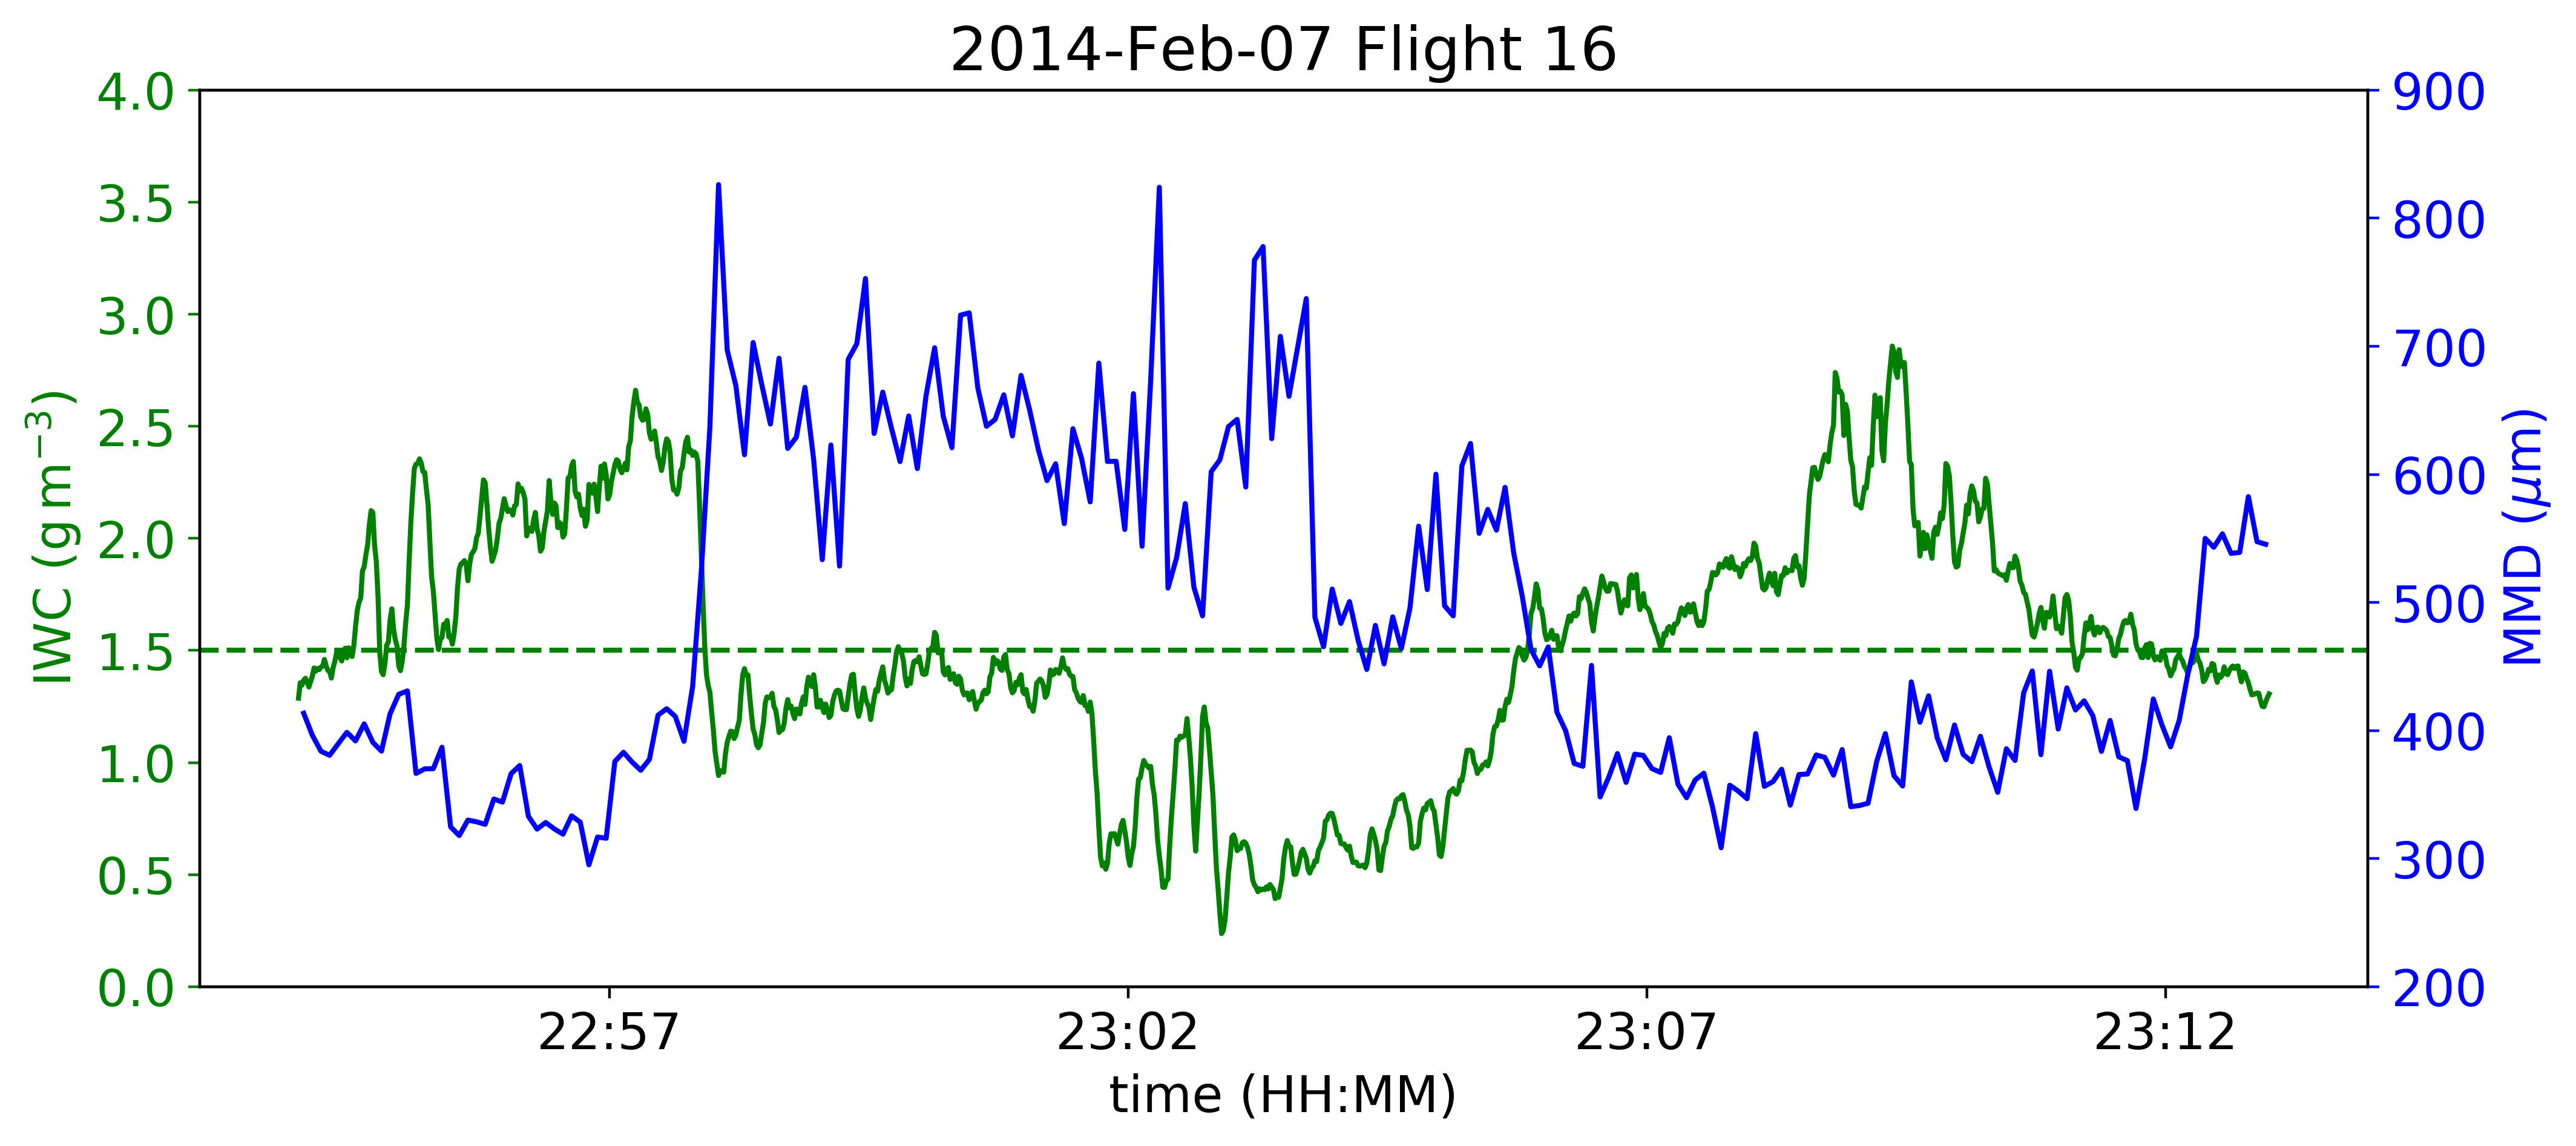

In [5]:
timeslc = [['2014-02-03T05:08:00', '2014-02-03T05:34:00'], ['2014-02-07T22:54:00', '2014-02-07T23:13:00']]
titles = ['2014-Feb-03 Flight 13','2014-Feb-07 Flight 16']

for i in range(2):
# i=0
    tmp = cmbds.sel(time=slice(*timeslc[i]))
    tmp2 = tmp.sel(time=~isnan(tmp.mmd))
    # tmp = tmp.isel(time=~isnan(tmp.mmd))

    fig, ax1 = plt.subplots(figsize=(11,5))
    ax1.plot(tmp.time,tmp.XKBZR5s,'g-')
    ax1.set_xlabel('time (HH:MM)')
    rcrg = ax1.get_xlim()
    ax1.plot(rcrg,[1.5,1.5],'g--')
    ax1.set_ylabel('IWC (g$\,\mathrm{m}^{-3}$)', color='g')
    ax1.tick_params('y', colors='g')
    # Make the y-axis label, ticks and tick labels match the line color.

    ax2 = ax1.twinx()
    ax2.plot(tmp2.time,tmp2.mmd,'b-')
    ax2.set_ylabel('MMD ($\mu$m)', color='b')
    ax2.tick_params('y', colors='b')

    ax1.set_xlim(rcrg)
    hfmt = matplotlib.dates.DateFormatter('%H:%M')
    ax1.xaxis.set_major_formatter(hfmt)
    ax1.set_title(titles[i])

    ax1.set_ylim([0,4])
    ax2.set_ylim([200,900])

    fig.tight_layout()

    plt.savefig('tmpfig/iwcmmd'+str(i)+'.jpg', format='jpg',bbox_inches='tight', dpi=400)
    plt.show()
# tmp2 = tmp2.sel(time=tmp2.XKBZR5s>1.)
# np.corrcoef(tmp2.mmd,tmp2.XKBZR5s)[0,1]

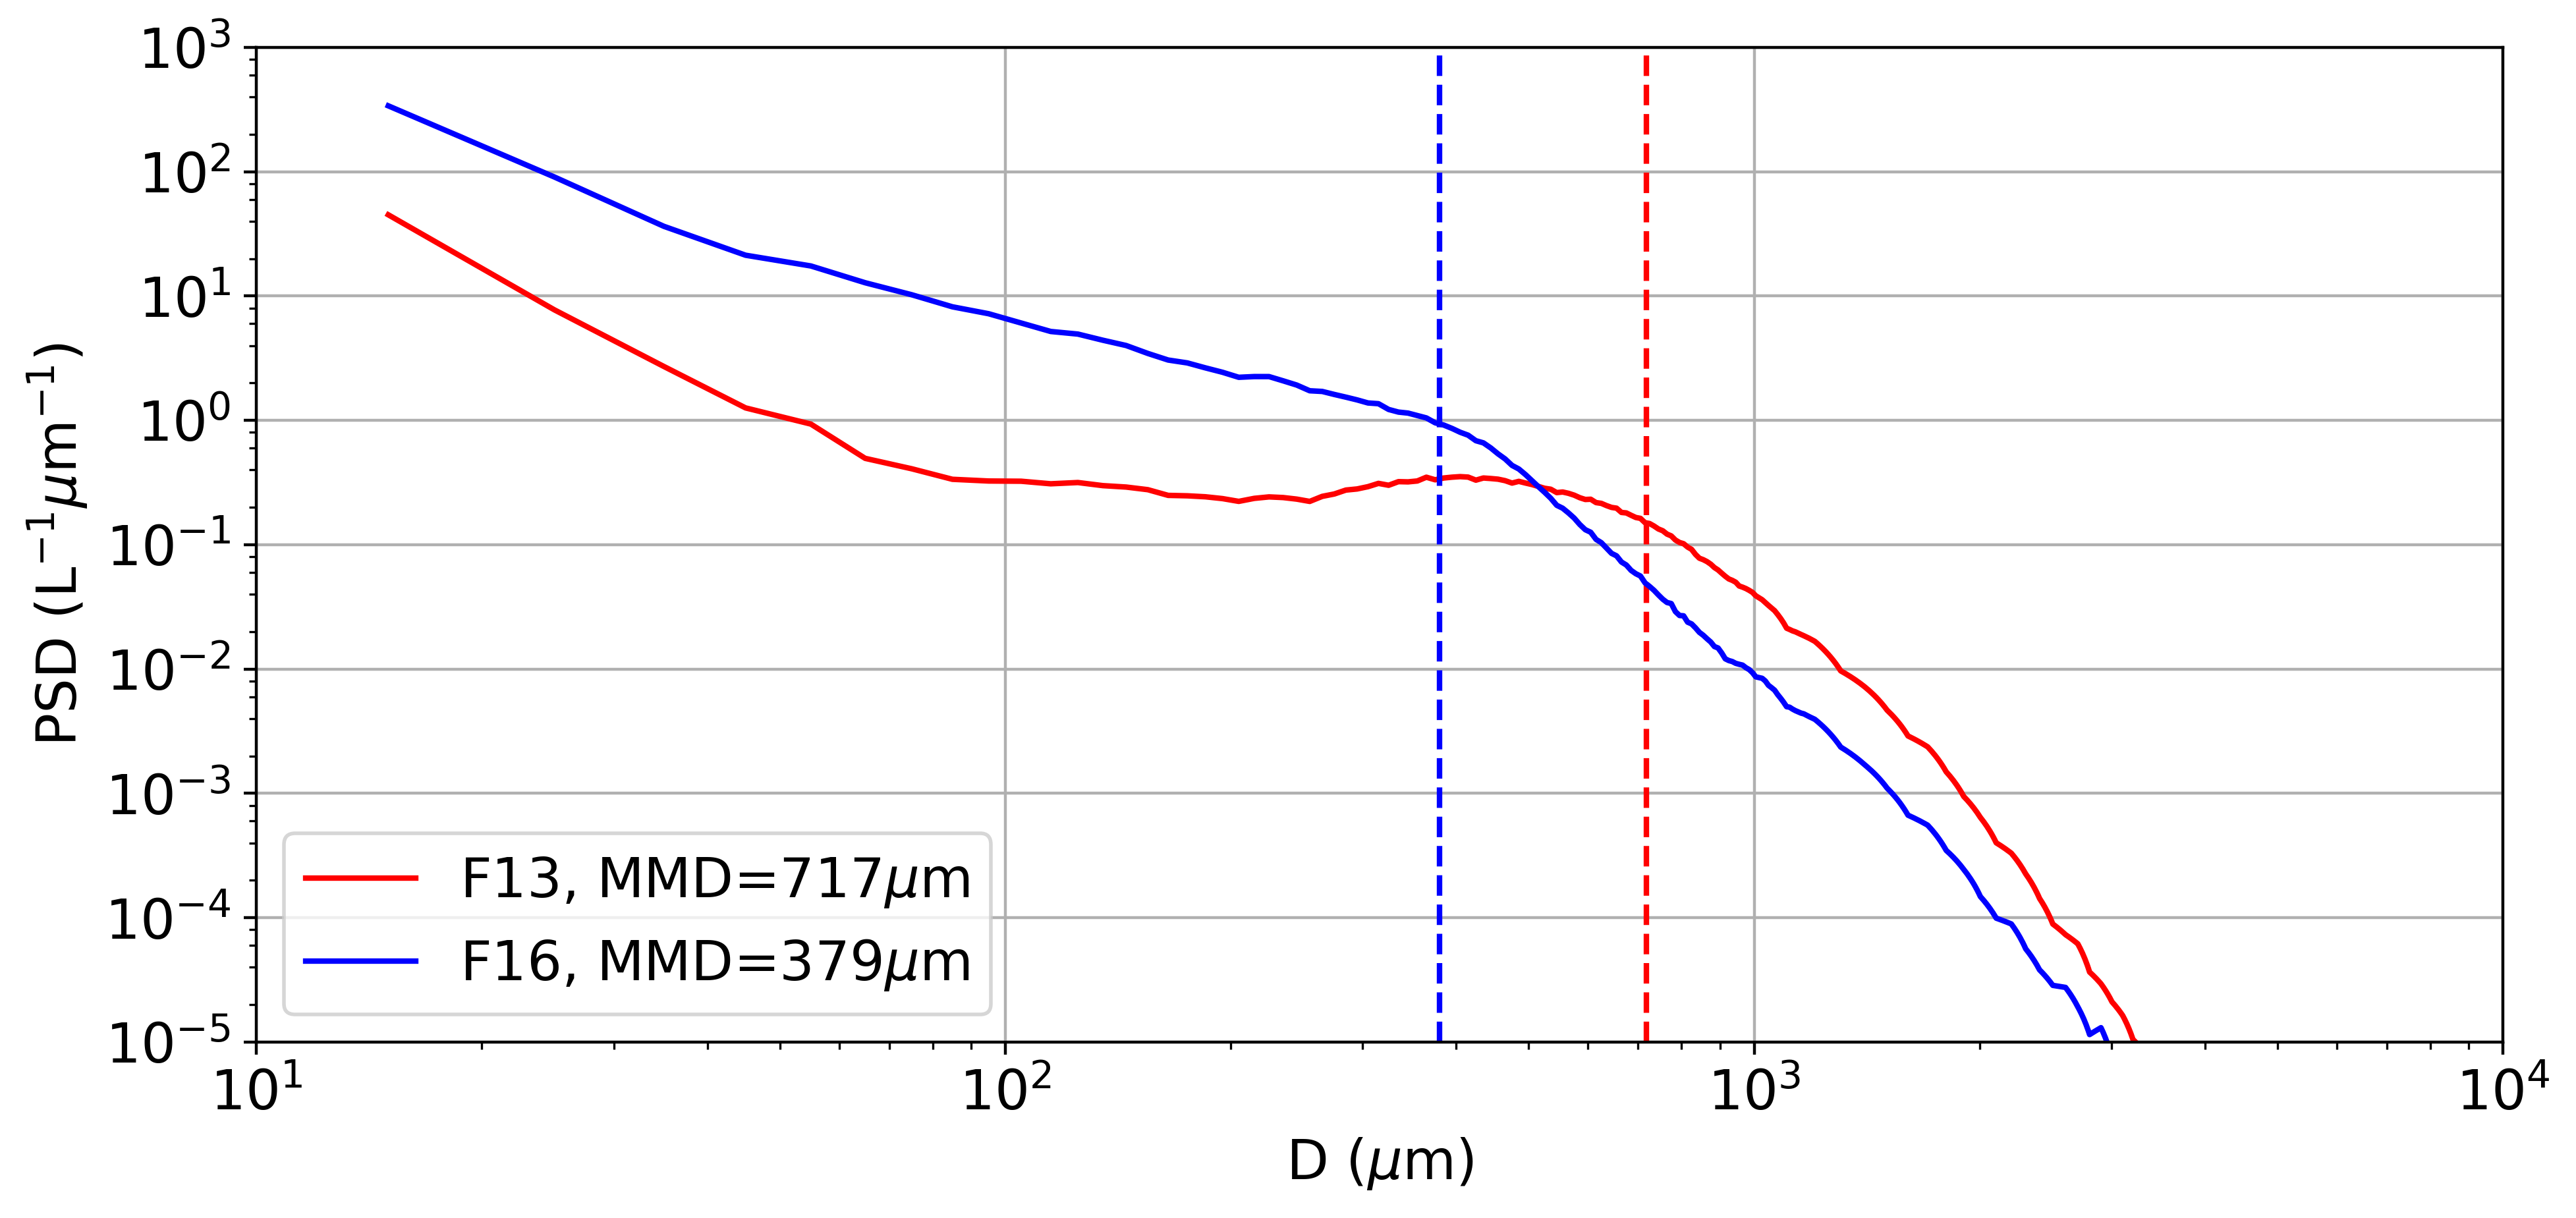

In [6]:
timeslc = [['2014-02-03T05:08:00', '2014-02-03T05:34:00'], ['2014-02-07T22:54:00', '2014-02-07T23:13:00']]
titles = ['2014-Feb-03 Flight 13','2014-Feb-07 Flight 16']

para={'color':['r','b'],'f':[13,16]}

fig, ax1 = plt.subplots(figsize=(11,5))
ylims = [1e-5,1e3]
plt.ylim(ylims)
plt.xlim([1e1,1e4])
for i in range(2):
    tmp = cmbds.sel(time=slice(*timeslc[i]))
    tmp2 = tmp.sel(time=~isnan(tmp.mmd))
    tmp2 = tmp2.sel(time=tmp2.XKBZR5s>1.5)
    # np.corrcoef(tmp2.mmd,tmp2.XKBZR5s)[0,1]
    tmppsd = rawpsd.psddmax[tmp2.indpsdforward.astype(int),:]
    mmdmean = np.mean(tmp2.mmd,axis=0)
    plt.plot([mmdmean,mmdmean],ylims,para['color'][i]+'--')
    plt.loglog(bin_mid,np.mean(tmppsd,axis=0),para['color'][i],label='F'+str(para['f'][i])+
               ', MMD='+str(int(mmdmean.values))+'$\mu$m')
plt.legend(loc='lower left')
plt.grid(b=True)
# plt.savefig('tmpfig/psd'+str(i)+'.jpg', format='jpg',bbox_inches='tight', dpi=400)
plt.ylabel('PSD ($\mathrm{L}^{-1}\mu\mathrm{m}^{-1}$)')
plt.xlabel('D ($\mu$m)')

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in less
  if not reflexive


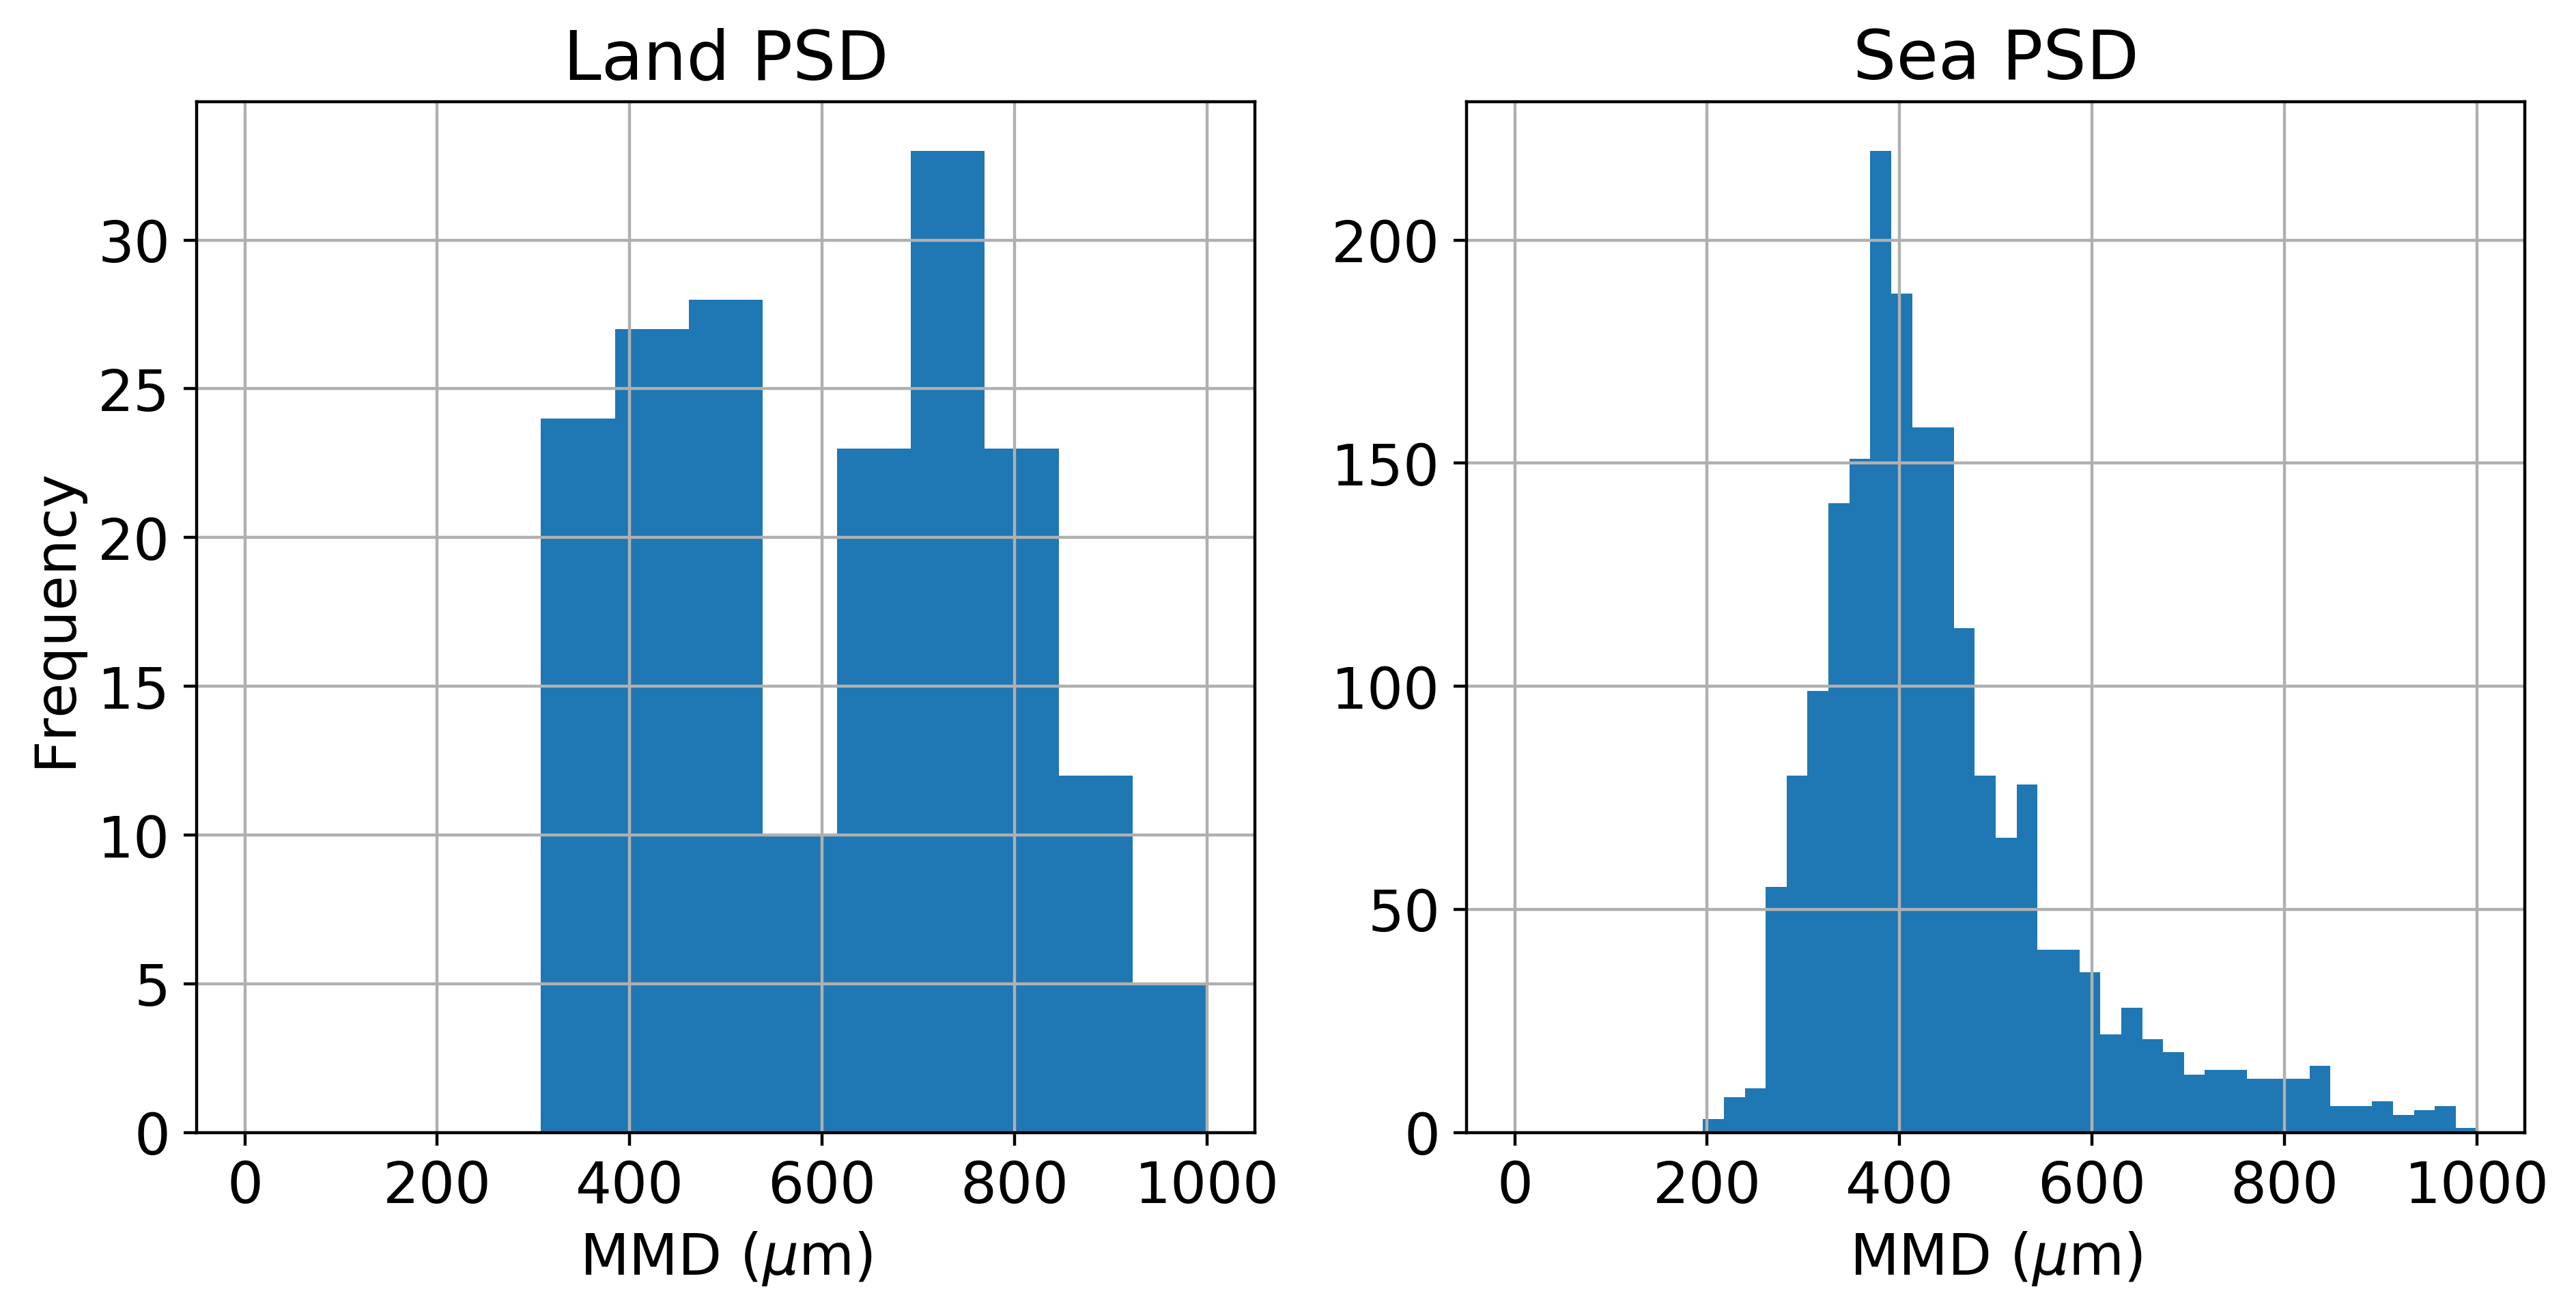

In [7]:
loopthru=np.arange(1,24)
loopthru=np.delete(loopthru,np.array([1,5,21,11,17,20])-1)

tmpsubset= cmbds.isel(time= (np.in1d(cmbds.flightnum,loopthru)) )
tmpsubset['landmark'] = tmpsubset.flightnum.astype(bool)

# m = Basemap(projection='merc',resolution='c',llcrnrlon=119.9,llcrnrlat=-20.1,fix_aspect=True,
#             urcrnrlon=150.1,urcrnrlat=-4.9)
# x,y = m(tmpsubset.longitude.values,tmpsubset.latitude.values)

# f_island = np.vectorize(m.is_land)
# tmplm = f_island(x,y)
# pickle.dump(tmplm,open( "pythondata/landmark.p", "wb" ))
tmplm = pickle.load(open( "pythondata/landmark.p", "rb" ))
tmpsubset['landmark'][:] = tmplm

lssubset = tmpsubset.isel(time = (~isnan(tmpsubset.mmd)) & (tmpsubset.XKBZR5s>1.5) 
                          & (tmpsubset.mmd<1e3) & (tmpsubset.air_temperature<-15) )

mmdland=lssubset.mmd[lssubset.landmark==True]
mmdsea=lssubset.mmd[lssubset.landmark==False]

fig, ax1 = plt.subplots(1,2,figsize=(11,5))

ax1[0].hist(mmdland,range=(0,1e3),bins='auto')
ax1[0].set_xlabel('MMD ($\mu$m)')
ax1[0].set_ylabel('Frequency')
ax1[0].set_title('Land PSD')
ax1[0].grid(b=True)
ax1[1].hist(mmdsea,range=(0,1e3),bins='auto')
ax1[1].set_xlabel('MMD ($\mu$m)')
# plt.xlim(0,1000)
ax1[1].set_title('Sea PSD')
ax1[1].grid(b=True)
plt.show()

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in less
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3

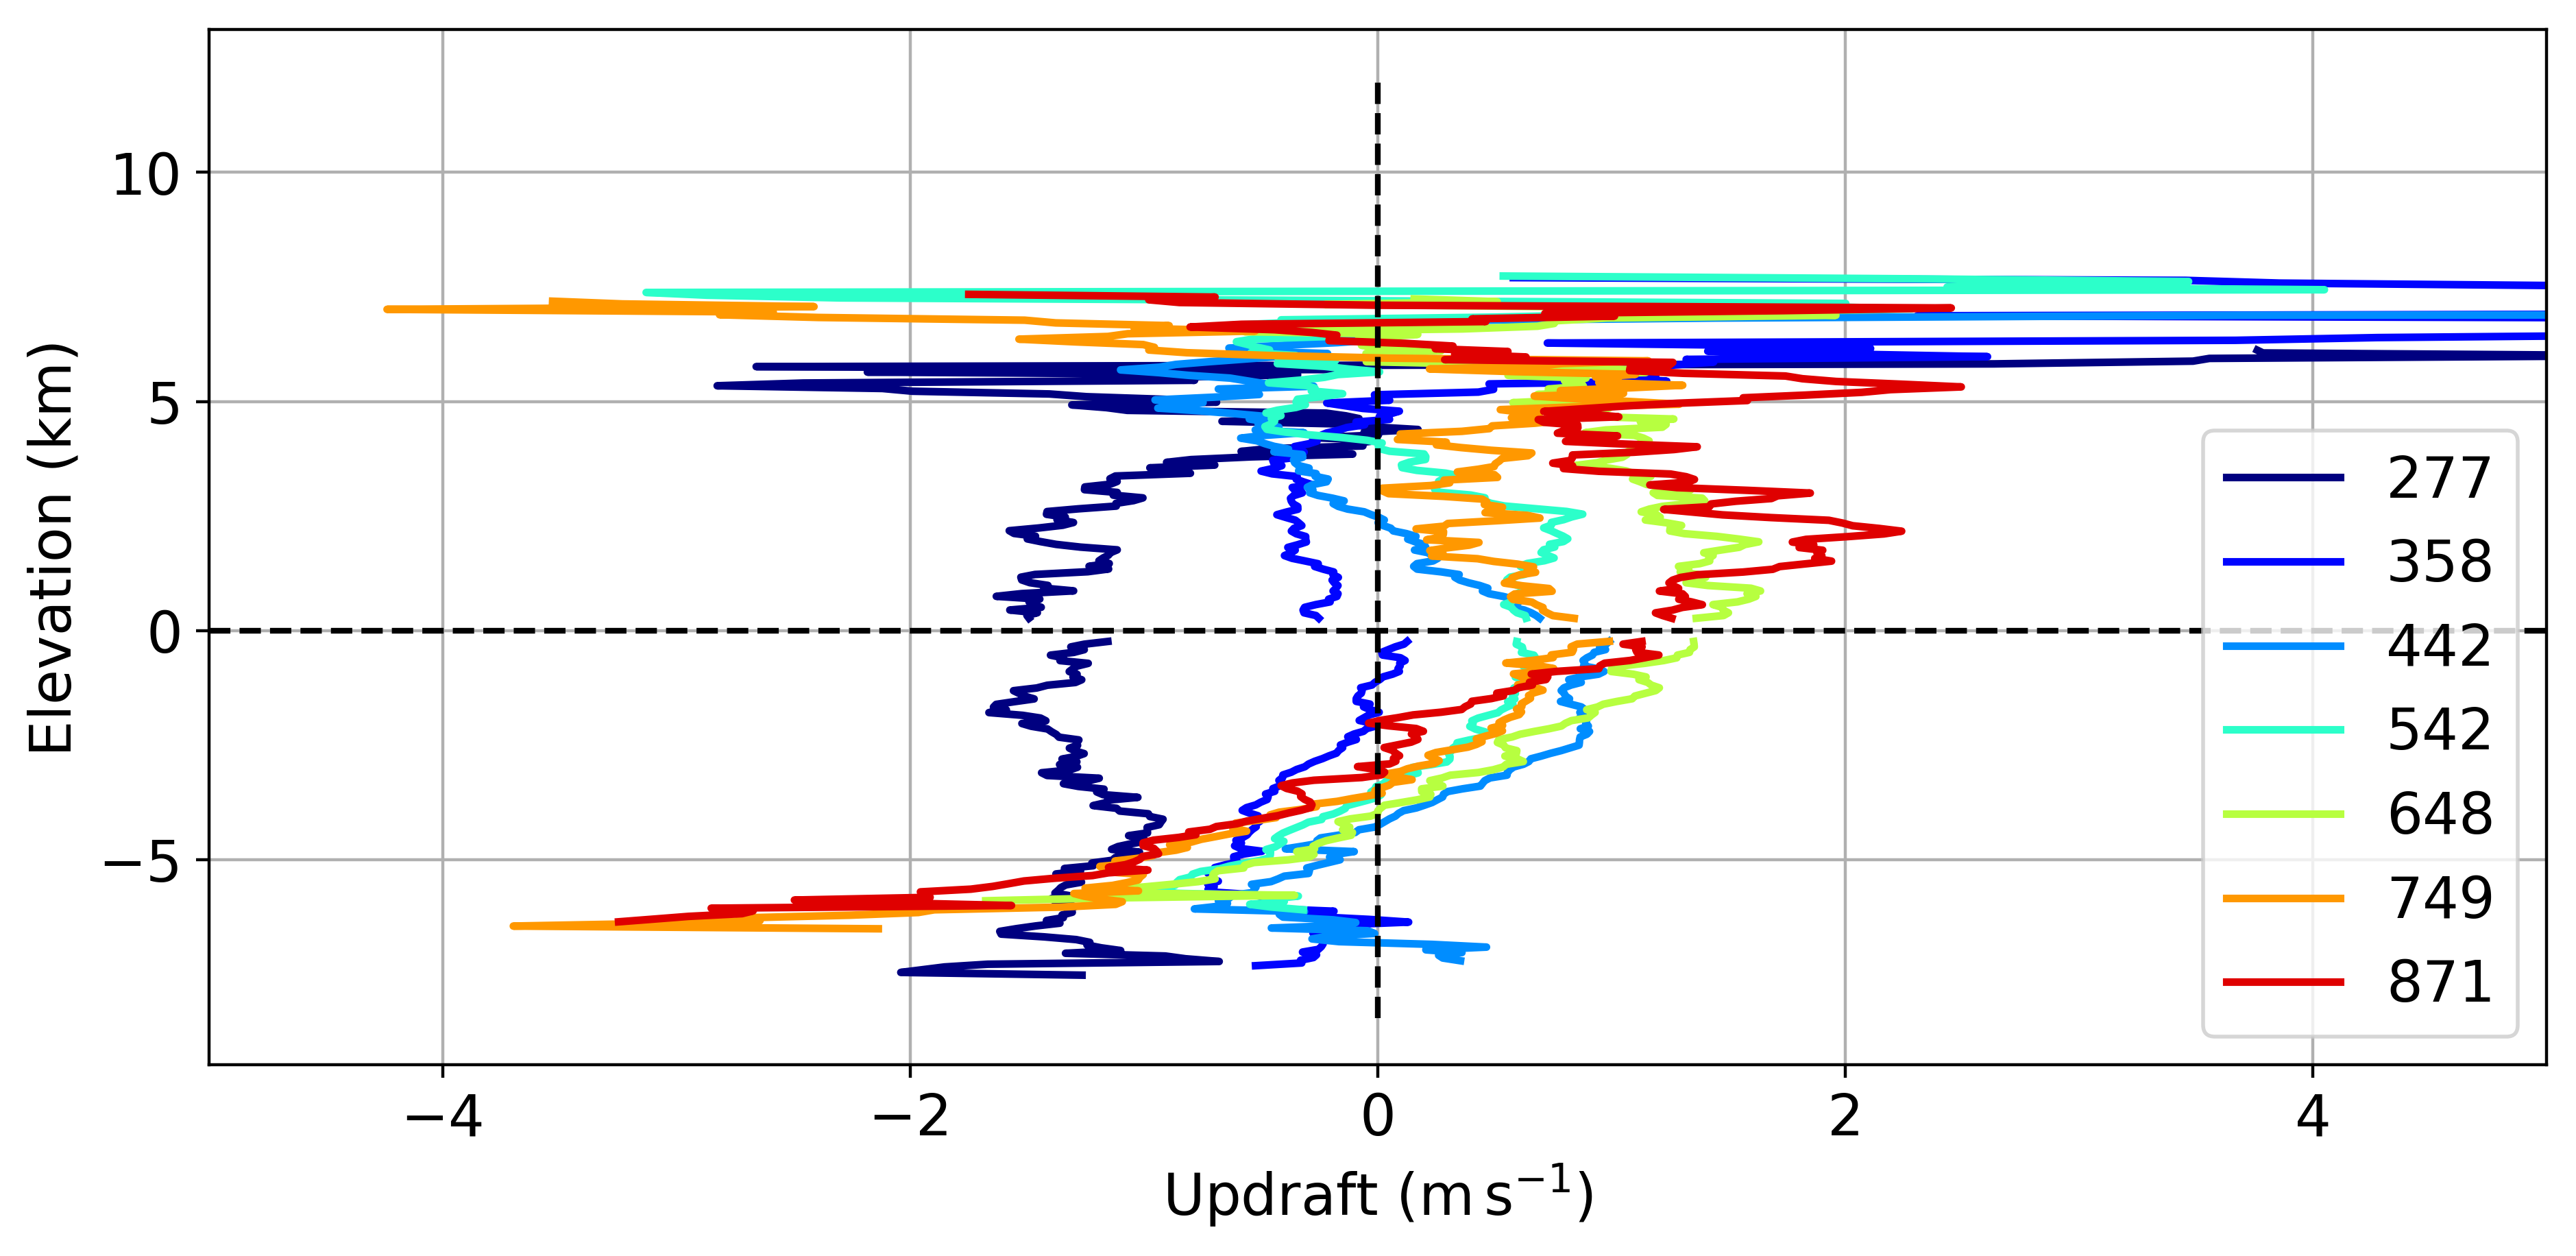

In [8]:
## Requires previous two cells run
fig, ax1 = plt.subplots(figsize=(11,5))

lssubset = tmpsubset.isel(time = (~isnan(tmpsubset.mmd)) & (tmpsubset.XKBZR5s>1.5) 
                          & (tmpsubset.mmd<1e3) & (tmpsubset.air_temperature<-15) )

updf = lssubset.w_ret.where((lssubset.Mask_Vz==1) | (lssubset.Mask_Vz==3))
mmdbins = np.array([0,200,300,400,500,600,700,800,1000])
mmdind = np.digitize(lssubset.mmd,mmdbins)

colormapping=mpl.cm.ScalarMappable(norm=None,cmap='jet')
colors=colormapping.to_rgba(mmdbins[1:-1])

# tmpc=np.array(['r','g','b','k'])
tmpmmd=np.zeros(len(mmdbins))
for j in range(1,len(mmdbins)-1):## skip the first bin (mmd<200)
    tmpind=np.in1d(mmdind,j+1)
    x1=updf[tmpind,:]
    y1=lssubset.height_2D[tmpind,:]-lssubset.height_2D[tmpind,249]
    x0=np.nanmean(x1,axis=0)
    y0=np.nanmean(y1,axis=0)
    tmpmmd[j]=np.nanmean(lssubset.mmd[tmpind])
    plot(x0,y0,c=colormapping.to_rgba(tmpmmd[j-1]),lw=2)
#     plot(x0,y0)

ax=plt.gca()
ax.legend(tmpmmd[1:-1].astype(int).astype(str),loc='best')
plt.ylabel('Elevation (km)')
plt.xlabel('Updraft (m$\,\mathrm{s}^{-1}$)')
plt.xlim(-5,5)
# plt.title('All Flights updraft MMD cases '+str(len(np.squeeze(cbmmd))))
plt.plot(plt.xlim(),np.array([0,0]),'k--')
plt.plot(np.array([0,0]),plt.ylim(),'k--')
plt.grid(b=True)
plt.show()

In [9]:
## Getting time periods of HIWC encounter
import scipy.signal
t = cmbds.XKBZR5s
t[isnan(t)] = 0.
t = scipy.signal.medfilt(t, kernel_size=15)
t = sz.nanmoving_mean(t,15)
act = (t>1.5).astype(int)
marker = np.diff(act)

starts = where(marker==1)[0]
ends = where(marker==-1)[0]

startends = []

if len(starts) != len(ends):
    sys.exit("starts and ends don't match!!")
    
for i in range(len(starts)):
    if (i==(len(starts)-1)) or (starts[i+1]>ends[i]):
        pass
    else:
        print(i)
        sys.exit("starts and ends don't match!!")
    
    length = ends[i]-starts[i]
    if length<15:
        continue
    start = int(starts[i]-floor(min(0.5*length,30)))
    end = int(ends[i]+floor(min(0.5*length,30)))
    startends.append((start,end))
'''
hiwcenc = pd.DataFrame(startends,columns=['start','end'])
hiwcenc['n0'] = np.NaN
hiwcenc['mu'] = np.NaN
hiwcenc['ld'] = np.NaN
hiwcenc['cc'] = np.NaN

todel = []
for i in range(len(hiwcenc)):
    tmparr = cmbds.isel(time = slice(hiwcenc.start[i],hiwcenc.end[i]))
    tmparr = tmparr.isel(time= ((~isnan(tmparr.mmd)) & (~isnan(tmparr.XKBZR5s)) ) )
    if len(tmparr.time) ==0:
        todel.append(i)
        continue
    hiwcenc.set_value(i, 'cc', np.corrcoef(tmparr.XKBZR5s.values,tmparr.mmd.values)[0,1])
    hiwcenc.set_value(i, 'n0', np.mean(tmparr.n0.values))
    hiwcenc.set_value(i, 'mu', np.mean(tmparr.mu.values))
    hiwcenc.set_value(i, 'ld', np.mean(tmparr.ld.values))
    
hiwcenc = hiwcenc.drop(hiwcenc.index[todel])
pickle.dump(hiwcenc,open( "pythondata/cc.p", "wb" ))
'''
hiwcenc = pickle.load(open( "pythondata/cc.p", "rb" ))

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/indexing.py:424: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  self.array[key] = value
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater


(0.0, 1.0, 0.0, 1.0)

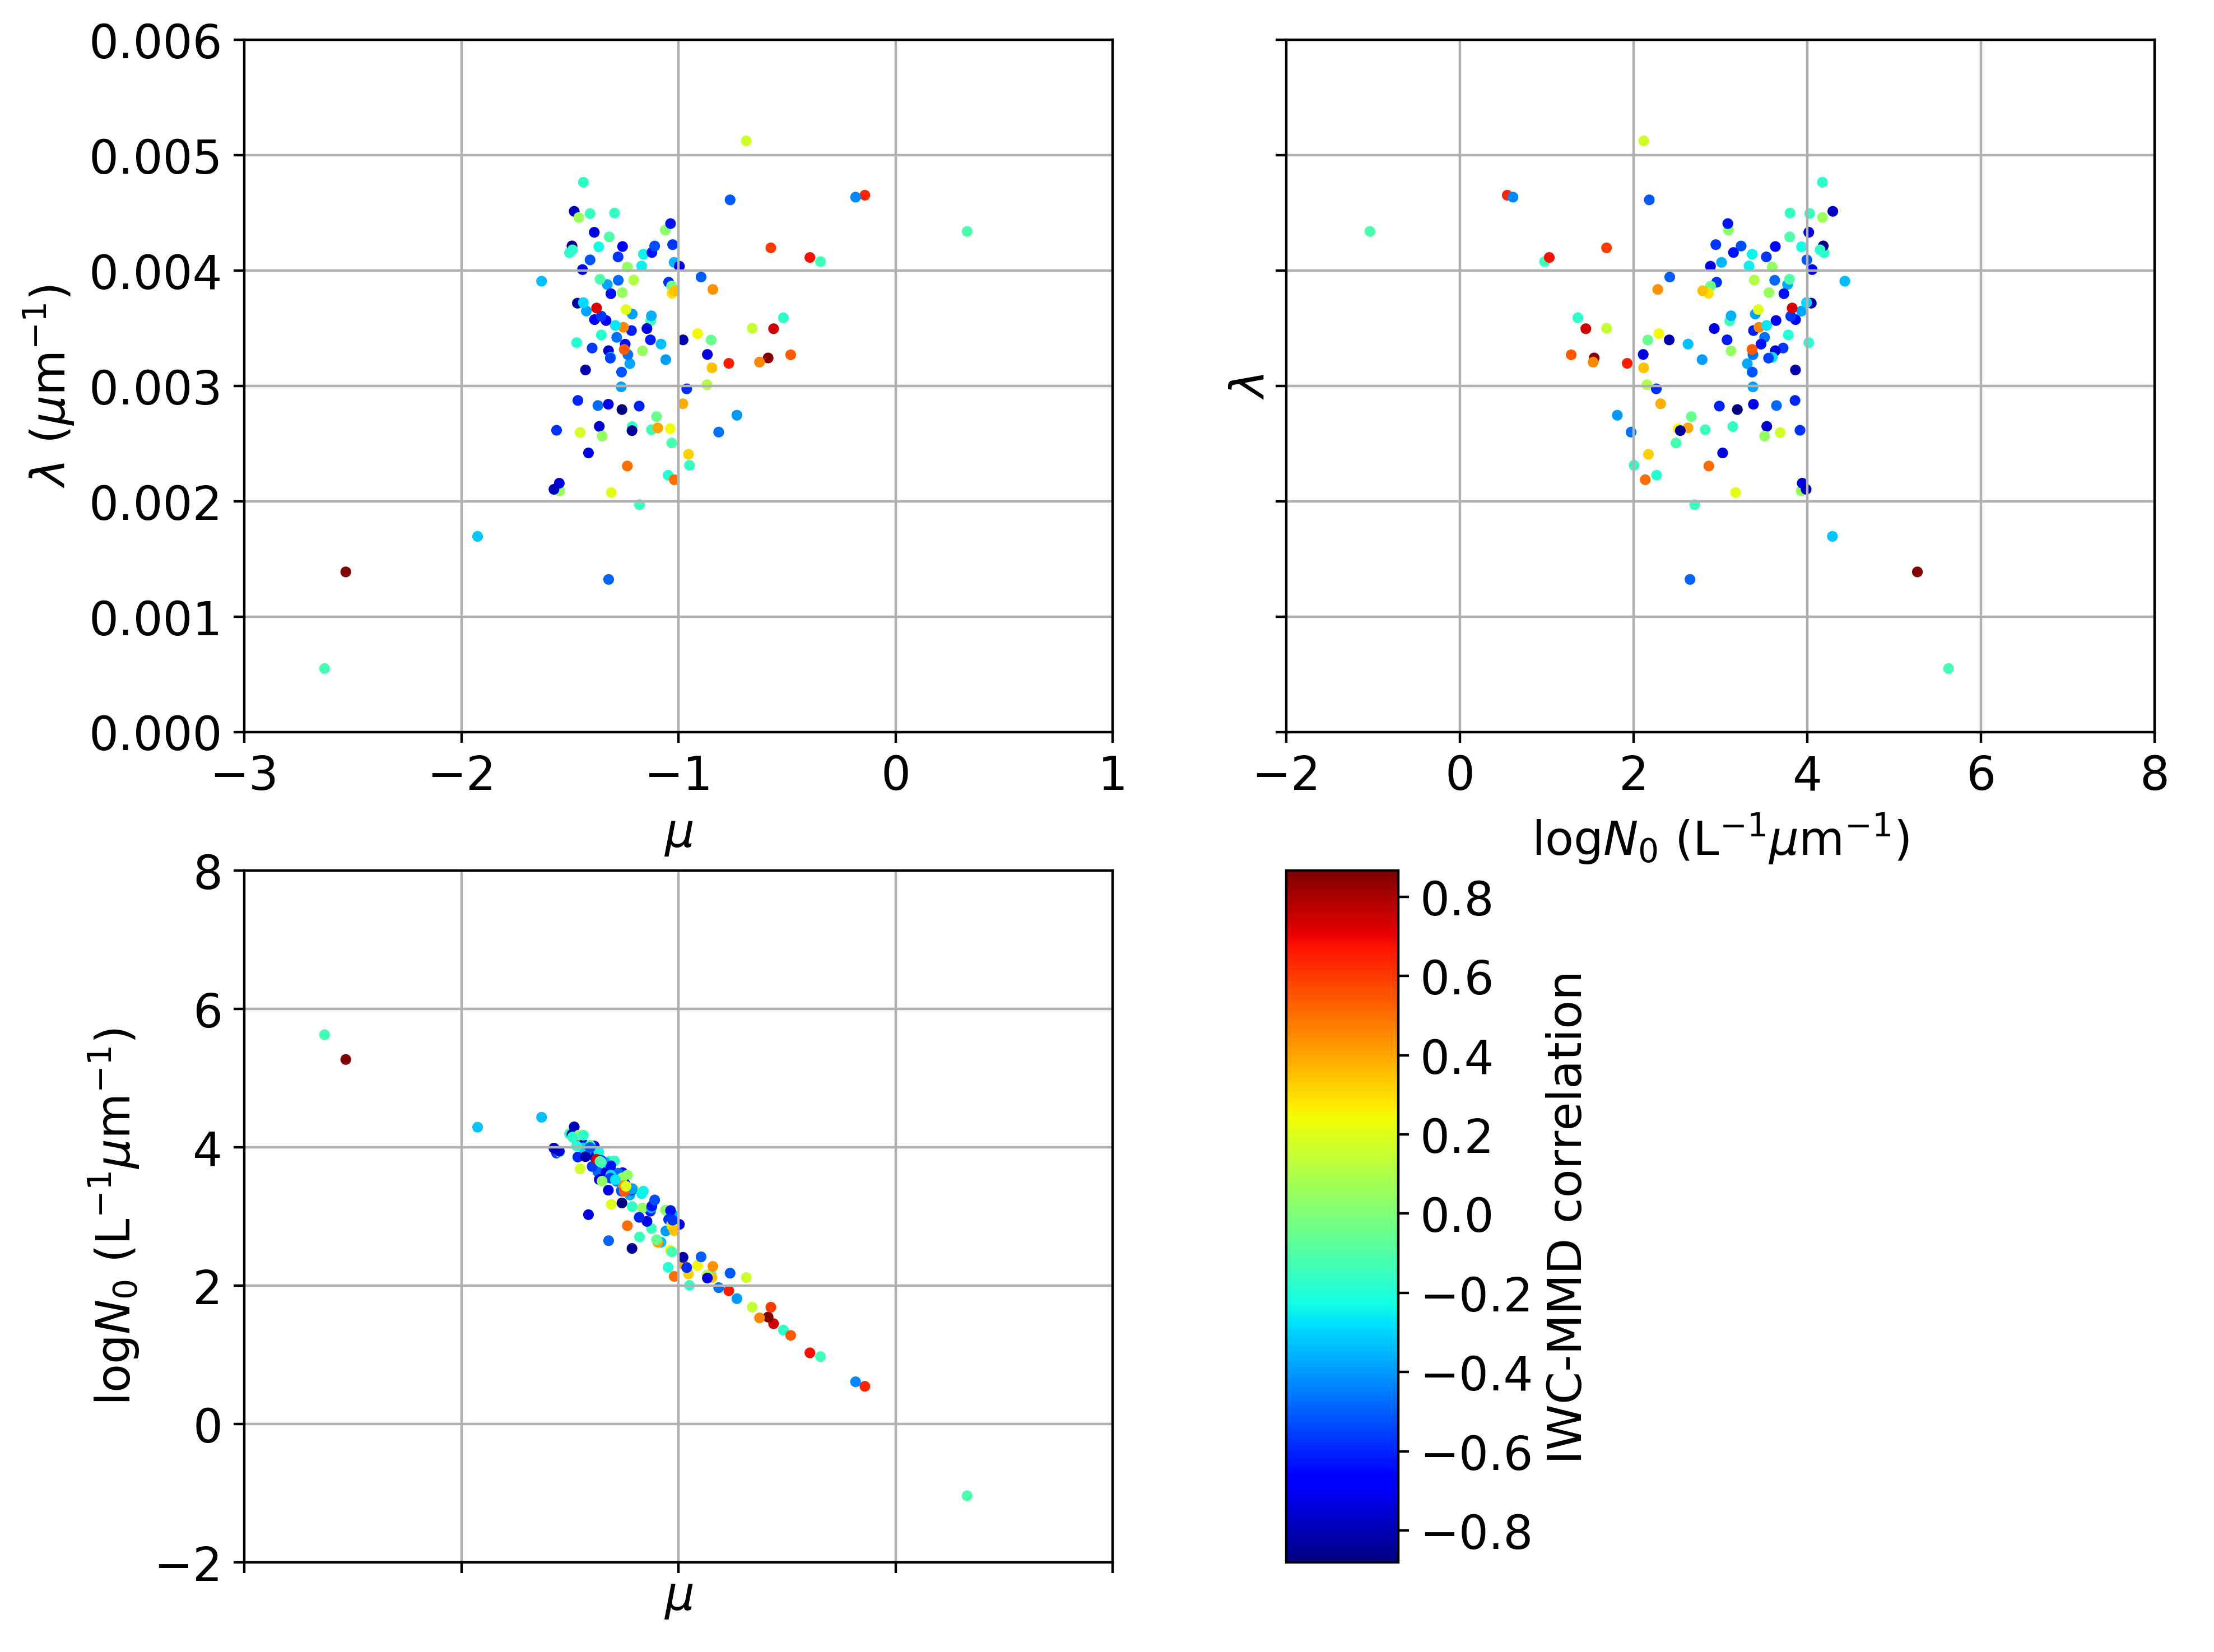

In [10]:
# plt.rcParams.update({'font.size': 15}) # Set default fontsize to 20 to accomodate figsize=(11,*)
plt.figure(figsize=(11,9))

ax1 = plt.subplot(2,2,1)
ax1.scatter(hiwcenc.mu,hiwcenc.ld,c=hiwcenc.cc,s=6)
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('$\lambda$ ($\mu\mathrm{m}^{-1}$)')
ax1.set_xlim(-3,1) #mu
ax1.set_ylim(0,6e-3) #lambda
plt.grid(b=True)

ax3 = plt.subplot(2,2,3,sharex=ax1)
ax3.scatter(hiwcenc.mu,hiwcenc.n0,c=hiwcenc.cc,s=6)
ax3.set_xlabel('$\mu$')
ax3.set_ylabel('$\log N_0$ ($\mathrm{L}^{-1}\mu\mathrm{m}^{-1}$)')
ax3.set_xlim(-3,1) #mu
ax3.set_ylim(-2,8) #n0
plt.setp(ax3.get_xticklabels(), visible=False)
plt.grid(b=True)

ax2 = plt.subplot(2,2,2,sharey=ax1)
handle = ax2.scatter(hiwcenc.n0,hiwcenc.ld,c=hiwcenc.cc,s=6)
ax2.set_xlabel('$\log N_0$ ($\mathrm{L}^{-1}\mu\mathrm{m}^{-1}$)')
ax2.set_ylabel('$\lambda$')
ax2.set_xlim(-2,8) #n0
ax2.set_ylim(0,6e-3) #lambda
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xticks(ax3.get_yticks())
plt.grid(b=True)

ax4 = plt.subplot(2,2,4)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax4)
cax = divider.append_axes("left", size="15%", pad=0.05)
hcb = plt.colorbar(handle,cax=cax)
hcb.set_label('IWC-MMD correlation')
ax4.axis('off')

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive


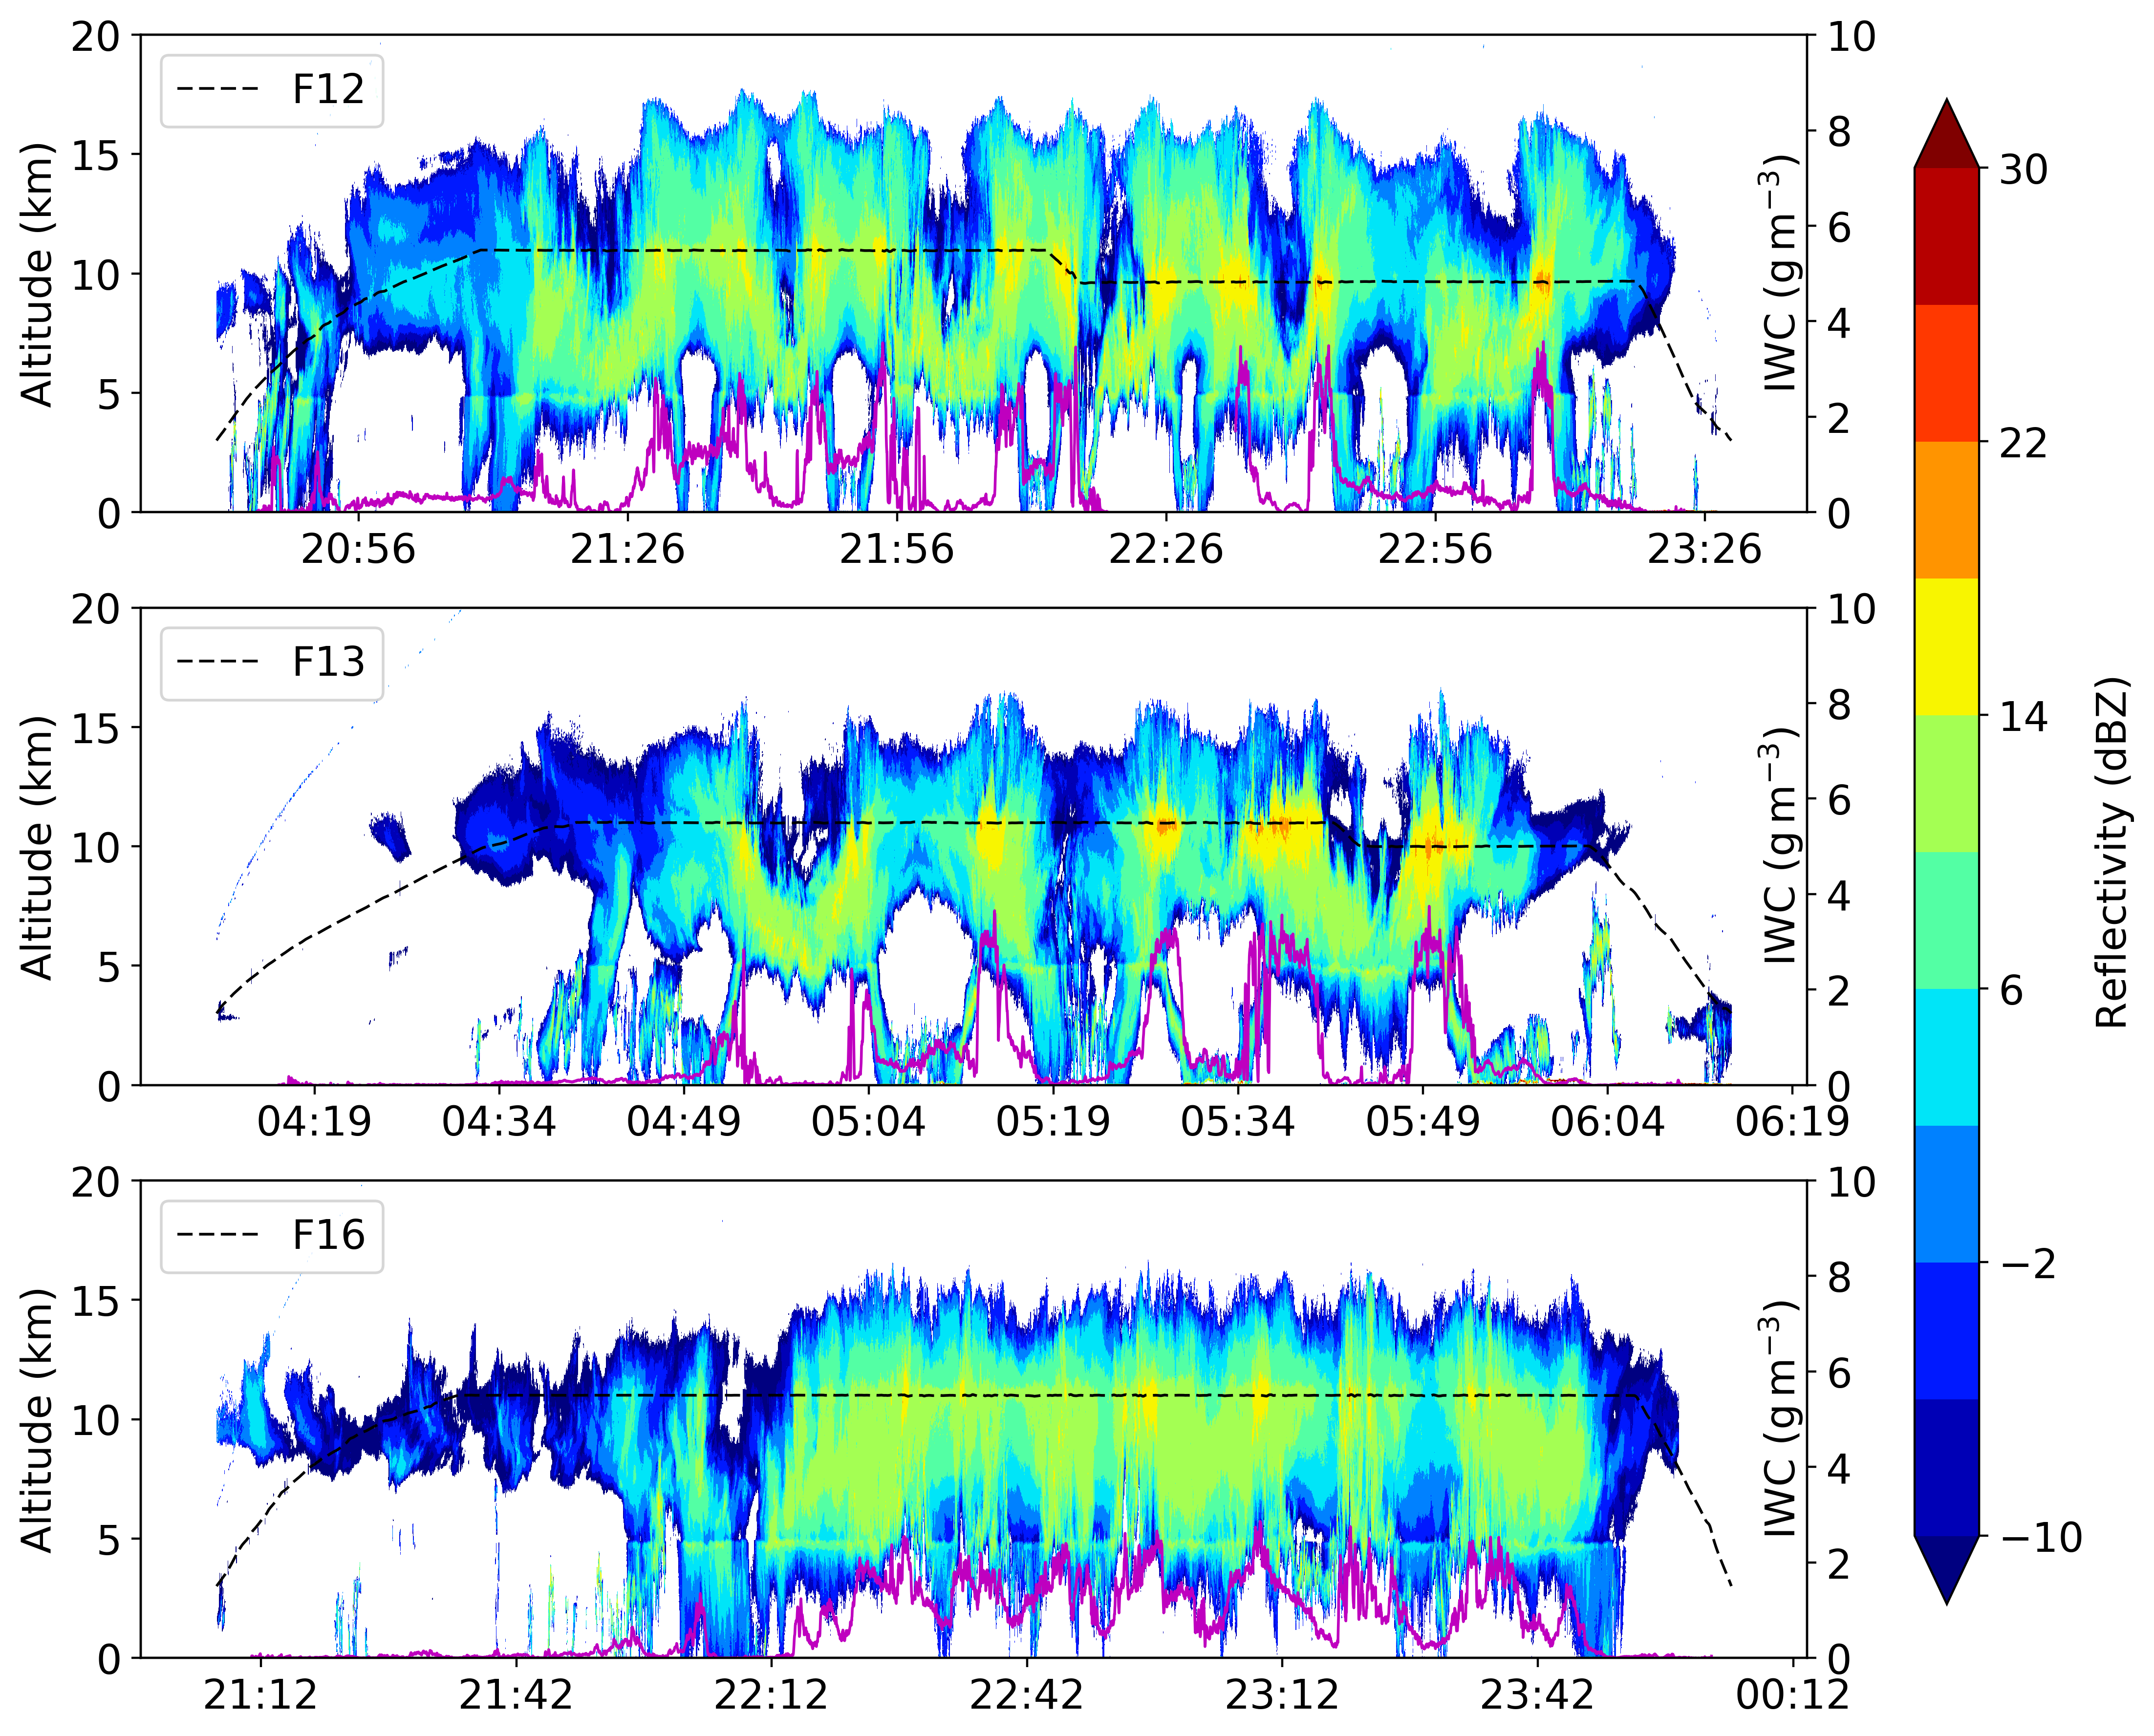

In [11]:
fig=plt.figure(figsize=[11,11])    ########### comment me
# mpl.rc("savefig", dpi=400)
# plt.rcParams.update({'font.size': 15}) # Set default fontsize to 20 to accomodate figsize=(11,*)
for pl,i in zip([1,2,3],[12,13,16]):
#     ind = (rawvards.flightnum==i)
#     raw = rawvards.isel(time=np.squeeze(np.where(ind)))

#     ### plt.contourf won't work if the X or Y contains any NaN!!!!
#     ### Therefore need to get rid of all the NaN's in the height_2D array produced by the interpolating.
#     ind = all(~isnan(rastads.height_2D),axis=1)
#     rasta = rastads.isel(time=np.squeeze(np.where(ind)))

#     rawp, rastap = xr.align(raw,rasta,join='inner')
    
    rawp = cmbds.isel(time= ((cmbds.flightnum==i)&(cmbds.altitude>3e3)))
    tmp = rawp.Z

#     tmp=rastap['Z']
    # tmp=tmp.where((ds.Mask_Vz==1) | (ds.Mask_Vz==3))
    # tmp=tmp.where((rastap.Mask_Vz==1))
    tmp=tmp.transpose()

    x = np.tile(rawp.time,(500,1))
    y = rawp.height_2D.transpose().values
    z = tmp
    ax=plt.subplot(3,1,pl)
    im = plt.contourf(x,y,z,np.linspace(-10,30,11),extend='both')

    time=rawp.time
    alt=rawp.altitude/1e3
    plt.plot(time,alt,'k--',linewidth=1.,label='F'+str(i))
    plt.legend(loc='upper left')

#     ax.autofmt_xdate()
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

    # ax=plt.gca()
    plt.ylim(0,20)
    plt.ylabel('Altitude (km)')
#     plt.title('F'+str(i))

    ax2=ax.twinx()
    time=rawp.time
    iwc=rawp.XKBZR5s
    ax2.plot(time,iwc,'m',linewidth=1.)
    ax2.set_ylim(0,10)
    _=ax2.set_ylabel('IWC (g$\,\mathrm{m}^{-3}$)')
    ax2.yaxis.set_label_coords(.97, .5)
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
hcb = fig.colorbar(im, cax=cbar_ax)
hcb.set_label('Reflectivity (dBZ)')
plt.show()